In [58]:
import os
import json
from pathlib import Path
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import datetime

In [59]:

# set seeds for reproducibility
random.seed(42)
np.random.seed(42)

In [60]:
# plotting defaults
plt.rcParams['figure.figsize'] = (9,5)
sns.set_style("whitegrid")

In [61]:

# local paths
DATA_DIR = r"C:\Users\ASUS\OneDrive\Documents\Project\data"
OUT_DIR = os.path.join(DATA_DIR, "visualizations")
ARTIFACT_DIR = os.path.join(DATA_DIR, "artifacts")
os.makedirs(OUT_DIR, exist_ok=True); os.makedirs(ARTIFACT_DIR, exist_ok=True)
print("DATA_DIR:", DATA_DIR)

DATA_DIR: C:\Users\ASUS\OneDrive\Documents\Project\data


In [62]:
# CELL 2 - Load all datasets
files = [f for f in os.listdir(DATA_DIR) if f.lower().endswith(('.csv','.xlsx'))]
print("Detected files:", files)
datasets = {}
for f in files:
    path = os.path.join(DATA_DIR, f)
    if f.lower().endswith('.csv'):
        df = pd.read_csv(path)
    else:
        df = pd.read_excel(path)
    datasets[f] = df
    print(f"{f}: {df.shape}")


Detected files: ['amazon_products_sales_data_cleaned.csv', 'Flipkart.csv', 'Meesho.xlsx', 'Myntra.csv', 'Snapdeal.csv', 'Tata CLiQ.csv']
amazon_products_sales_data_cleaned.csv: (42675, 17)
Flipkart.csv: (11399, 20)
Meesho.xlsx: (9994, 21)
Myntra.csv: (76000, 16)
Snapdeal.csv: (10000, 14)
Tata CLiQ.csv: (100, 24)


c:\Users\ASUS\OneDrive\Documents\Project\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [63]:
# CELL 2 - Load all datasets
files = [f for f in os.listdir(DATA_DIR) if f.lower().endswith(('.csv','.xlsx'))]
print("Detected files:", files)
datasets = {}
for f in files:
    path = os.path.join(DATA_DIR, f)
    if f.lower().endswith('.csv'):
        df = pd.read_csv(path)
    else:
        df = pd.read_excel(path)
    datasets[f] = df
    print(f"{f}: {df.shape}")


Detected files: ['amazon_products_sales_data_cleaned.csv', 'Flipkart.csv', 'Meesho.xlsx', 'Myntra.csv', 'Snapdeal.csv', 'Tata CLiQ.csv']
amazon_products_sales_data_cleaned.csv: (42675, 17)
Flipkart.csv: (11399, 20)
Meesho.xlsx: (9994, 21)
Myntra.csv: (76000, 16)
Snapdeal.csv: (10000, 14)
Tata CLiQ.csv: (100, 24)


c:\Users\ASUS\OneDrive\Documents\Project\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [64]:
# Loop through all datasets in the dictionary
for name, df in datasets.items():
    print(f"\n📊 Dataset: {name}")
    print("-" * 70)
    
    # Check for missing values in each column
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    
    # Combine into a summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing_count,
        'Missing (%)': missing_percent.round(2)
    })
    
    # Display only columns with missing values
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
    
    if not missing_summary.empty:
        print(f"🔍 Columns with missing values in '{name}':")
        display(missing_summary)
    else:
        print("✅ No missing values found in this dataset.")



📊 Dataset: amazon_products_sales_data_cleaned.csv
----------------------------------------------------------------------
🔍 Columns with missing values in 'amazon_products_sales_data_cleaned.csv':


,Missing Values,Missing (%)
product_rating,1024,2.40
total_reviews,1024,2.40
purchased_last_month,10511,24.63
discounted_price,2062,4.83
original_price,2062,4.83
buy_box_availability,14653,34.34
delivery_date,11983,28.08
sustainability_tags,39267,92.01
product_page_url,2069,4.85
discount_percentage,2062,4.83



📊 Dataset: Flipkart.csv
----------------------------------------------------------------------
🔍 Columns with missing values in 'Flipkart.csv':


,Missing Values,Missing (%)
Delivery_person_Age,491,4.31
Delivery_person_Ratings,507,4.45
Time_Orderd,444,3.90
Weather,158,1.39
Road_traffic_density,154,1.35
multiple_deliveries,238,2.09
Festival,65,0.57
City,324,2.84



📊 Dataset: Meesho.xlsx
----------------------------------------------------------------------
🔍 Columns with missing values in 'Meesho.xlsx':


,Missing Values,Missing (%)
Postal Code,11,0.11



📊 Dataset: Myntra.csv
----------------------------------------------------------------------
✅ No missing values found in this dataset.

📊 Dataset: Snapdeal.csv
----------------------------------------------------------------------
✅ No missing values found in this dataset.

📊 Dataset: Tata CLiQ.csv
----------------------------------------------------------------------
✅ No missing values found in this dataset.


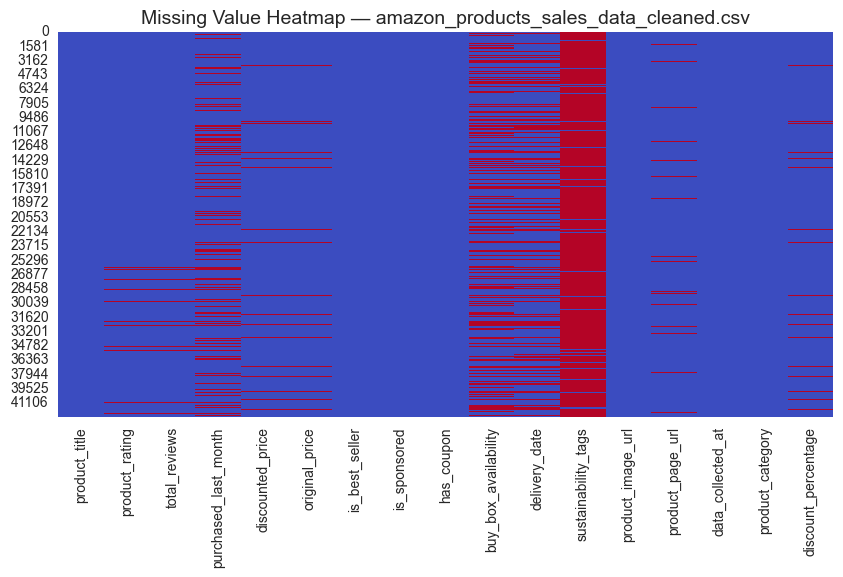

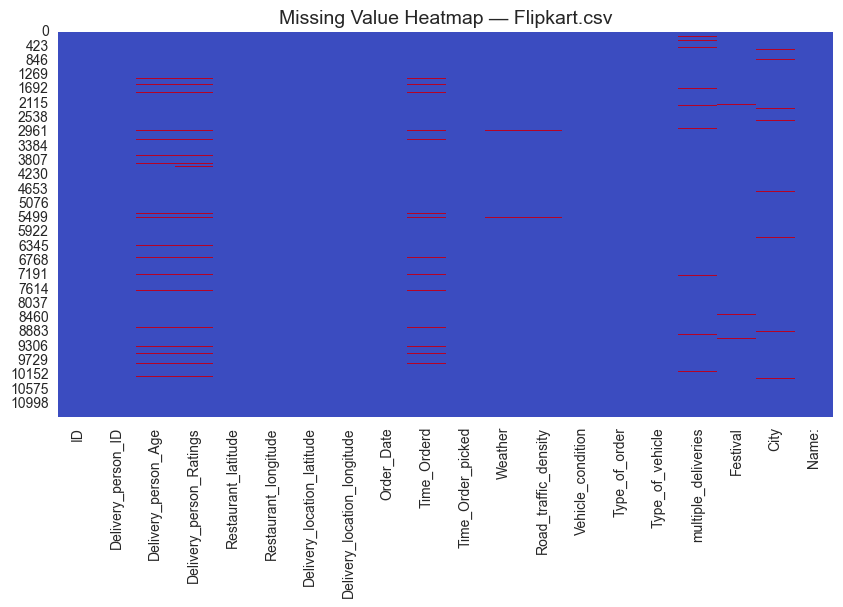

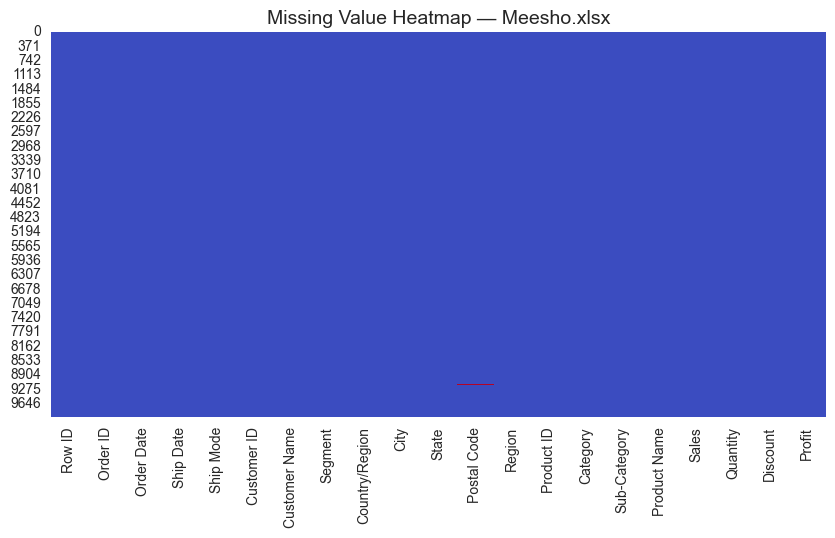

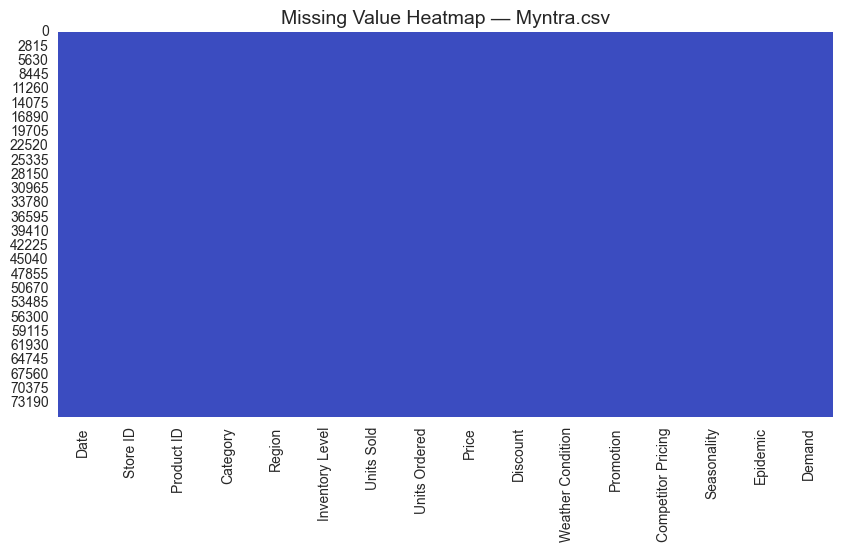

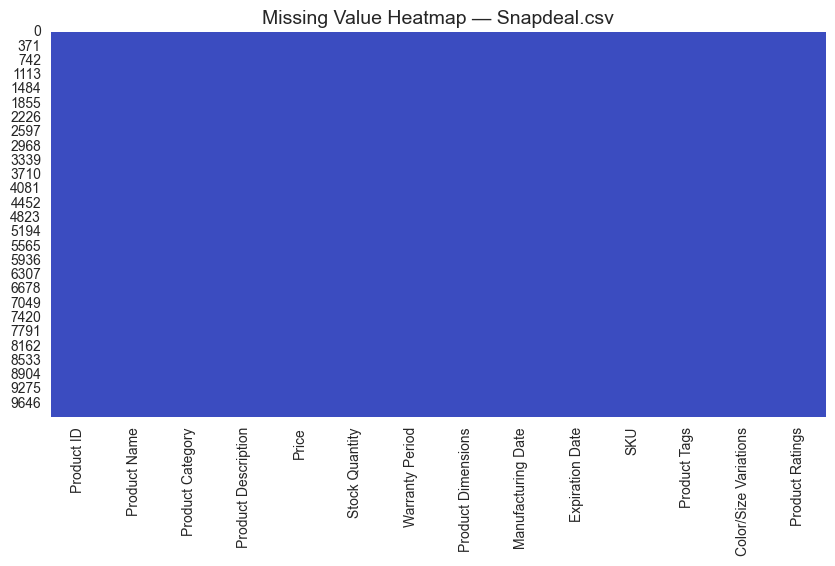

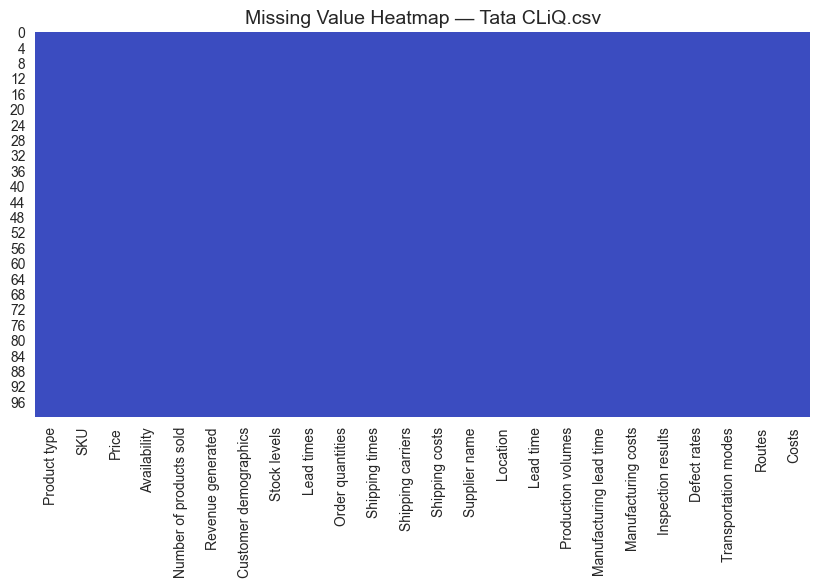

In [65]:
for name, df in datasets.items():
    plt.figure(figsize=(10, 5))
    plt.title(f"Missing Value Heatmap — {name}", fontsize=14)
    sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
    plt.show()


📊 Dataset: amazon_products_sales_data_cleaned.csv
--------------------------------------------------------------------------------
🔍 Columns with missing values in 'amazon_products_sales_data_cleaned.csv':


,Missing Values,Missing (%)
product_rating,1024,2.40
total_reviews,1024,2.40
purchased_last_month,10511,24.63
discounted_price,2062,4.83
original_price,2062,4.83
buy_box_availability,14653,34.34
delivery_date,11983,28.08
sustainability_tags,39267,92.01
product_page_url,2069,4.85
discount_percentage,2062,4.83


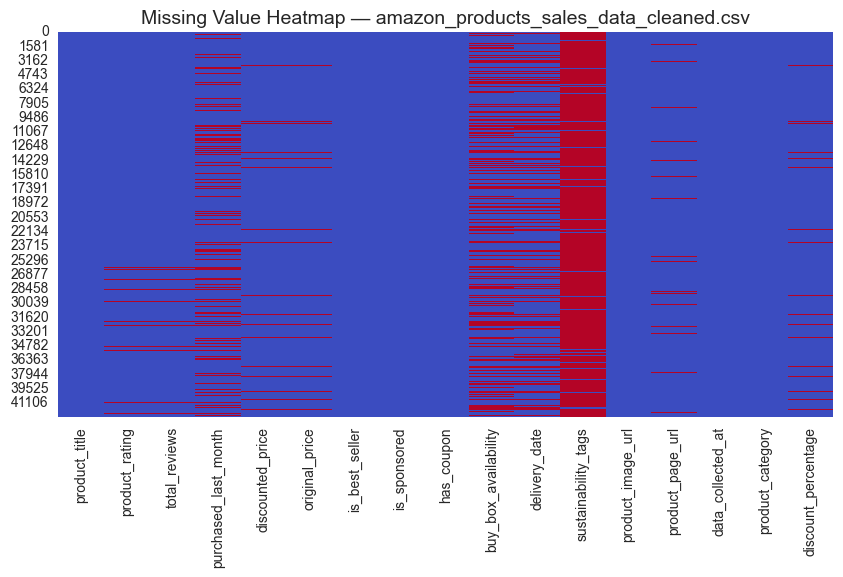


🧩 Cleaning Dataset: amazon_products_sales_data_cleaned.csv
--------------------------------------------------------------------------------
📈 Numeric columns: ['product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'discount_percentage']
🔤 Categorical columns: ['product_title', 'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'delivery_date', 'sustainability_tags', 'product_image_url', 'product_page_url', 'data_collected_at', 'product_category']
✔ Filled 'product_rating' with MEAN (2.40% missing)
✔ Filled 'total_reviews' with MEAN (2.40% missing)
✔ Filled 'purchased_last_month' with MEDIAN (24.63% missing)
✔ Filled 'discounted_price' with MEAN (4.83% missing)
✔ Filled 'original_price' with MEAN (4.83% missing)
✔ Filled 'discount_percentage' with MEAN (4.83% missing)
⚠️ Dropped 'buy_box_availability' — too many missing (34.34%)
✔ Filled 'delivery_date' with MODE ('2025-09-04') (28.08% missing)
⚠️ Dropped 'sustainability_t

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3801959206.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3801959206.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Missing Values,Missing (%)
Delivery_person_Age,491,4.31
Delivery_person_Ratings,507,4.45
Time_Orderd,444,3.90
Weather,158,1.39
Road_traffic_density,154,1.35
multiple_deliveries,238,2.09
Festival,65,0.57
City,324,2.84


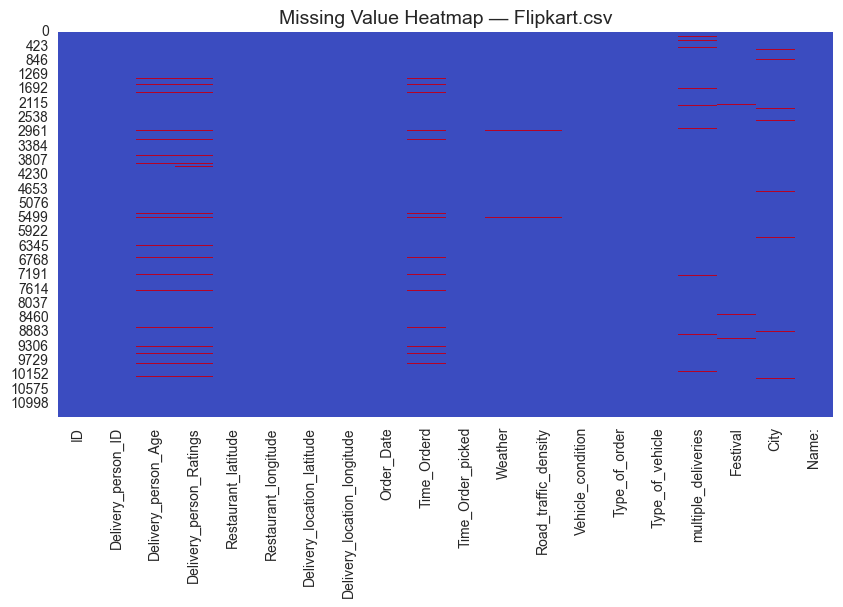


🧩 Cleaning Dataset: Flipkart.csv
--------------------------------------------------------------------------------
📈 Numeric columns: ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition', 'multiple_deliveries']
🔤 Categorical columns: ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'Name:']
✔ Filled 'Delivery_person_Age' with MEAN (4.31% missing)
✔ Filled 'Delivery_person_Ratings' with MEAN (4.45% missing)
✔ Filled 'multiple_deliveries' with MEAN (2.09% missing)
✔ Filled 'Time_Orderd' with MODE ('18:20') (3.90% missing)
✔ Filled 'Weather' with MODE ('Sunny') (1.39% missing)
✔ Filled 'Road_traffic_density' with MODE ('Low') (1.35% missing)
✔ Filled 'Festival' with MODE ('No') (0.57% missing)
✔ Filled 'City' with MODE ('Metropolitian') (2.84% mi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3801959206.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3801959206.py:94: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


,Missing Values,Missing (%)
Postal Code,11,0.11


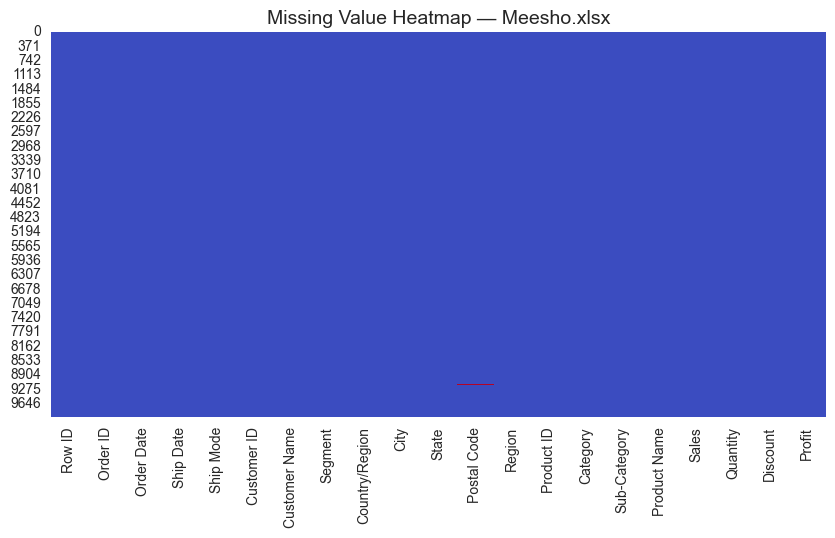


🧩 Cleaning Dataset: Meesho.xlsx
--------------------------------------------------------------------------------
📈 Numeric columns: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
🔤 Categorical columns: ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
✔ Filled 'Postal Code' with MEAN (0.11% missing)
✅ Cleaning completed for 'Meesho.xlsx' — Final shape: (9994, 21)

📊 Dataset: Myntra.csv
--------------------------------------------------------------------------------
✅ No missing values found in this dataset.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3801959206.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)


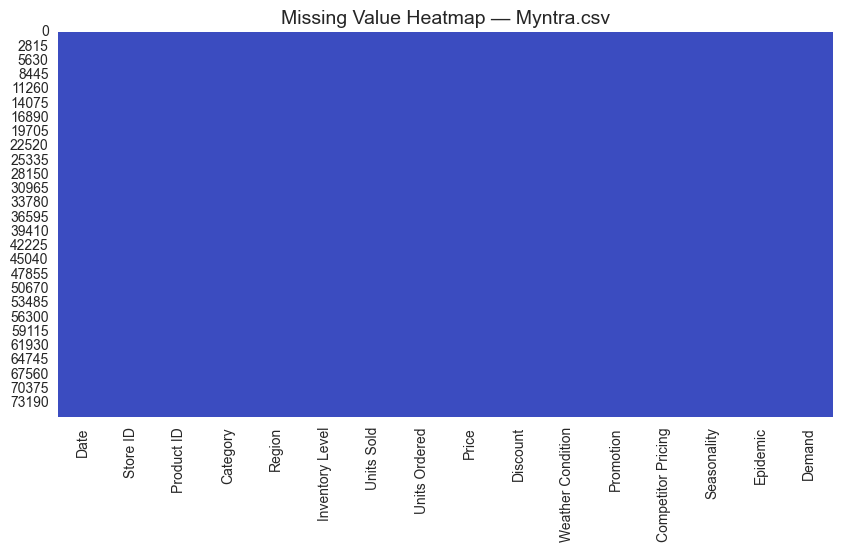


🧩 Cleaning Dataset: Myntra.csv
--------------------------------------------------------------------------------
📈 Numeric columns: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'Demand']
🔤 Categorical columns: ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
✅ Cleaning completed for 'Myntra.csv' — Final shape: (76000, 16)

📊 Dataset: Snapdeal.csv
--------------------------------------------------------------------------------
✅ No missing values found in this dataset.


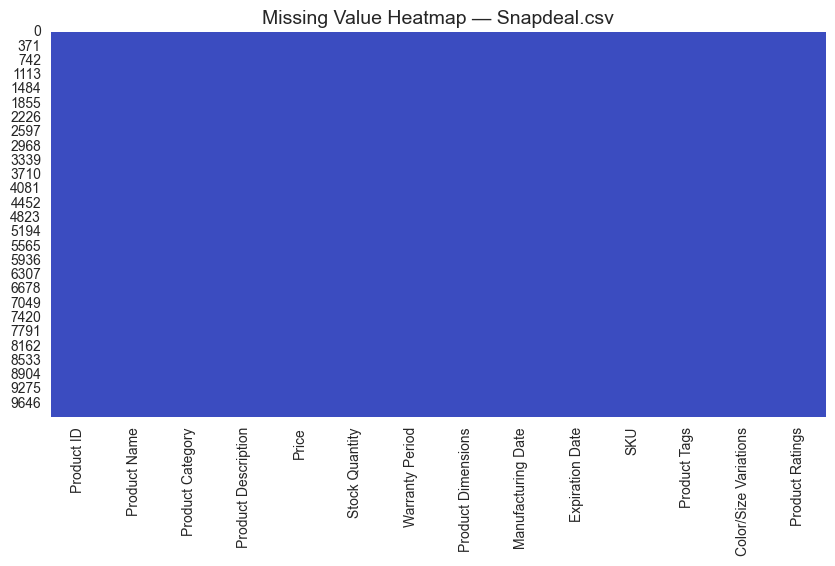


🧩 Cleaning Dataset: Snapdeal.csv
--------------------------------------------------------------------------------
📈 Numeric columns: ['Price', 'Stock Quantity', 'Warranty Period', 'Product Ratings']
🔤 Categorical columns: ['Product ID', 'Product Name', 'Product Category', 'Product Description', 'Product Dimensions', 'Manufacturing Date', 'Expiration Date', 'SKU', 'Product Tags', 'Color/Size Variations']
✅ Cleaning completed for 'Snapdeal.csv' — Final shape: (10000, 14)

📊 Dataset: Tata CLiQ.csv
--------------------------------------------------------------------------------
✅ No missing values found in this dataset.


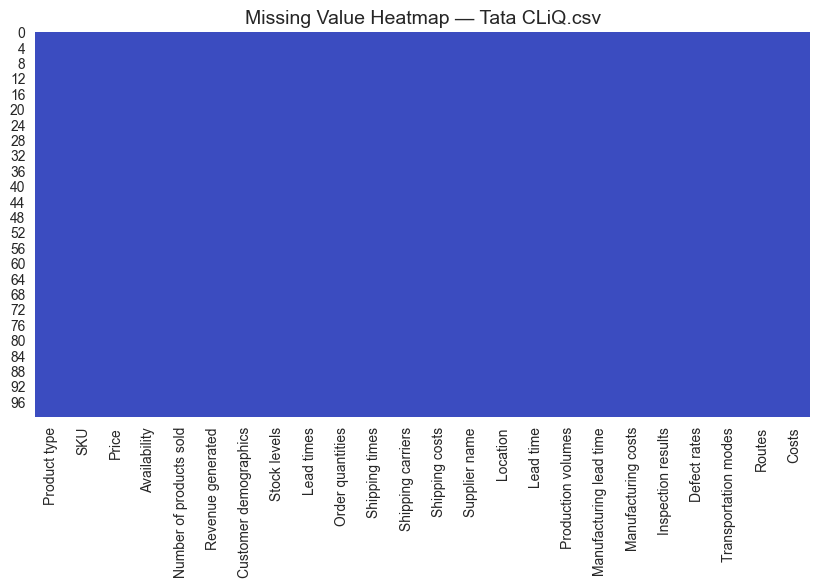


🧩 Cleaning Dataset: Tata CLiQ.csv
--------------------------------------------------------------------------------
📈 Numeric columns: ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
🔤 Categorical columns: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']
✅ Cleaning completed for 'Tata CLiQ.csv' — Final shape: (100, 24)


In [ ]:
# ================================================================
# 🔧 Missing Value Detection, Visualization & Cleaning for All Datasets
# ================================================================

cleaned_datasets = {}

# Loop through each dataset in dictionary
for name, df in datasets.items():
    print(f"\n📊 Dataset: {name}")
    print("-" * 80)
    
    # -----------------------------
    # Step 1: Missing Value Summary
    # -----------------------------
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Missing Values': missing_count,
        'Missing (%)': missing_percent.round(2)
    })
    
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
    
    if not missing_summary.empty:
        print(f"🔍 Columns with missing values in '{name}':")
        display(missing_summary)
    else:
        print("✅ No missing values found in this dataset.")
    
    # -----------------------------
    # Step 2: Visualize Missing Data
    # -----------------------------
    plt.figure(figsize=(10, 5))
    plt.title(f"Missing Value Heatmap — {name}", fontsize=14)
    sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
    plt.show()
    
    # -----------------------------
    # Step 3: Cleaning Missing Values
    # -----------------------------
    print(f"\n🧩 Cleaning Dataset: {name}")
    print("-" * 80)
    
    # Copy to avoid changing original
    df_clean = df.copy()
    
    # Identify numeric and categorical columns
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df_clean.select_dtypes(include=['object', 'category', 'bool']).columns
    
    print(f"📈 Numeric columns: {list(numeric_cols)}")
    print(f"🔤 Categorical columns: {list(categorical_cols)}")
    
    # -----------------------------
    # Step 4: Handle Numeric Columns
    # -----------------------------
    # Strategy:
    # - <5% missing → fill with mean
    # - 5–30% missing → fill with median
    # - >30% missing → drop column
    
    for col in numeric_cols:
        missing_ratio = df_clean[col].isnull().mean()
        if missing_ratio == 0:
            continue
        elif missing_ratio < 0.05:
            df_clean[col].fillna(df_clean[col].mean(), inplace=True)
            print(f"✔ Filled '{col}' with MEAN ({missing_ratio:.2%} missing)")
        elif missing_ratio < 0.3:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"✔ Filled '{col}' with MEDIAN ({missing_ratio:.2%} missing)")
        else:
            df_clean.drop(columns=[col], inplace=True)
            print(f"⚠️ Dropped '{col}' — too many missing ({missing_ratio:.2%})")
    
    # -----------------------------
    # Step 5: Handle Categorical Columns
    # -----------------------------
    # Strategy:
    # - <30% missing → fill with mode
    # - >30% missing → drop column
    
    for col in categorical_cols:
        missing_ratio = df_clean[col].isnull().mean()
        if missing_ratio == 0:
            continue
        elif missing_ratio < 0.3:
            mode_value = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_value, inplace=True)
            print(f"✔ Filled '{col}' with MODE ('{mode_value}') ({missing_ratio:.2%} missing)")
        else:
            df_clean.drop(columns=[col], inplace=True)
            print(f"⚠️ Dropped '{col}' — too many missing ({missing_ratio:.2%})")
    
    # -----------------------------
    # Step 6: Drop Remaining Missing Rows (if any)
    # -----------------------------
    remaining_nulls = df_clean.isnull().sum().sum()
    if remaining_nulls > 0:
        print(f"⚠️ {remaining_nulls} missing values remain — dropping affected rows")
        df_clean.dropna(inplace=True)
    
    print(f"✅ Cleaning completed for '{name}' — Final shape: {df_clean.shape}")
    
    # Store cleaned dataset
    cleaned_datasets[name] = df_clean


In [74]:

cleaned_datasets = {}   # ✅ define BEFORE loop

for name, df in datasets.items():
    print(f"\n🧹 Cleaning Dataset: {name}")
    print("-" * 80)
    
    df_clean = df.copy()
    print(f"Initial shape: {df_clean.shape}")

    # Identify column types
    num_cols = df_clean.select_dtypes(include=['int64','float64']).columns
    cat_cols = df_clean.select_dtypes(include=['object','category','bool']).columns

    # --- Numeric columns ---
    for col in num_cols:
        miss_ratio = df_clean[col].isnull().mean()
        if miss_ratio == 0:
            continue
        elif miss_ratio < 0.05:
            df_clean[col].fillna(df_clean[col].mean(), inplace=True)
            print(f"✔ {col}: filled with MEAN ({miss_ratio:.1%} missing)")
        elif miss_ratio < 0.3:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"✔ {col}: filled with MEDIAN ({miss_ratio:.1%} missing)")
        else:
            df_clean.drop(columns=[col], inplace=True)
            print(f"⚠️ Dropped {col}: {miss_ratio:.1%} missing")

    # --- Categorical columns ---
    for col in cat_cols:
        miss_ratio = df_clean[col].isnull().mean()
        if miss_ratio == 0:
            continue
        elif miss_ratio < 0.3:
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"✔ {col}: filled with MODE '{mode_val}' ({miss_ratio:.1%} missing)")
        else:
            df_clean.drop(columns=[col], inplace=True)
            print(f"⚠️ Dropped {col}: {miss_ratio:.1%} missing")

    # Drop rows still containing NaN
    remaining = df_clean.isnull().sum().sum()
    if remaining > 0:
        df_clean.dropna(inplace=True)
        print(f"⚠️ Dropped rows with remaining NaN: {remaining}")

    print(f"✅ Final shape: {df_clean.shape}")

    # ✅ Store this cleaned DataFrame in dictionary
    cleaned_datasets[name] = df_clean

print("\nAll datasets cleaned. Total:", len(cleaned_datasets))
print("Datasets:", list(cleaned_datasets.keys()))



🧹 Cleaning Dataset: amazon_products_sales_data_cleaned.csv
--------------------------------------------------------------------------------
Initial shape: (42675, 17)
✔ product_rating: filled with MEAN (2.4% missing)
✔ total_reviews: filled with MEAN (2.4% missing)
✔ purchased_last_month: filled with MEDIAN (24.6% missing)
✔ discounted_price: filled with MEAN (4.8% missing)
✔ original_price: filled with MEAN (4.8% missing)
✔ discount_percentage: filled with MEAN (4.8% missing)
⚠️ Dropped buy_box_availability: 34.3% missing
✔ delivery_date: filled with MODE '2025-09-04' (28.1% missing)
⚠️ Dropped sustainability_tags: 92.0% missing
✔ product_page_url: filled with MODE 'https://www.amazon.com/%E3%80%90%E4%BB%BB%E5%A4%A9%E5%A0%82%E7%B4%94%E6%AD%A3%E5%93%81%E3%80%91Joy-L-%E3%83%91%E3%82%B9%E3%83%86%E3%83%AB%E3%83%91%E3%83%BC%E3%83%97%E3%83%AB-%E3%83%91%E3%82%B9%E3%83%86%E3%83%AB%E3%82%B0%E3%83%AA%E3%83%BC%E3%83%B3-Nintendo-Switch/dp/B0C6X2PYBH/ref=sr_1_5316?dib=eyJ2IjoiMSJ9.6M7LmHKRu2GNIrB

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\2101628769.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\2101628769.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


✔ Weather: filled with MODE 'Sunny' (1.4% missing)
✔ Road_traffic_density: filled with MODE 'Low' (1.4% missing)
✔ Festival: filled with MODE 'No' (0.6% missing)
✔ City: filled with MODE 'Metropolitian' (2.8% missing)
✅ Final shape: (11399, 20)

🧹 Cleaning Dataset: Meesho.xlsx
--------------------------------------------------------------------------------
Initial shape: (9994, 21)
✔ Postal Code: filled with MEAN (0.1% missing)
✅ Final shape: (9994, 21)

🧹 Cleaning Dataset: Myntra.csv
--------------------------------------------------------------------------------
Initial shape: (76000, 16)
✅ Final shape: (76000, 16)

🧹 Cleaning Dataset: Snapdeal.csv
--------------------------------------------------------------------------------
Initial shape: (10000, 14)
✅ Final shape: (10000, 14)

🧹 Cleaning Dataset: Tata CLiQ.csv
--------------------------------------------------------------------------------
Initial shape: (100, 24)
✅ Final shape: (100, 24)

All datasets cleaned. Total: 6
Datasets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\2101628769.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)


In [68]:
# EDA apply on All Datasets

In [75]:
for name, df in cleaned_datasets.items():
    print(f"\n📊 Exploratory Data Analysis — {name}")
    print("-" * 100)
    base_name = os.path.splitext(name)[0]


📊 Exploratory Data Analysis — amazon_products_sales_data_cleaned.csv
----------------------------------------------------------------------------------------------------

📊 Exploratory Data Analysis — Flipkart.csv
----------------------------------------------------------------------------------------------------

📊 Exploratory Data Analysis — Meesho.xlsx
----------------------------------------------------------------------------------------------------

📊 Exploratory Data Analysis — Myntra.csv
----------------------------------------------------------------------------------------------------

📊 Exploratory Data Analysis — Snapdeal.csv
----------------------------------------------------------------------------------------------------

📊 Exploratory Data Analysis — Tata CLiQ.csv
----------------------------------------------------------------------------------------------------


In [76]:
# Basic Overview
for name, df in cleaned_datasets.items():
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data Types:\n{df.dtypes}")

Shape: (42675, 15)
Columns: ['product_title', 'product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored', 'has_coupon', 'delivery_date', 'product_image_url', 'product_page_url', 'data_collected_at', 'product_category', 'discount_percentage']
Data Types:
product_title            object
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller           object
is_sponsored             object
has_coupon               object
delivery_date            object
product_image_url        object
product_page_url         object
data_collected_at        object
product_category         object
discount_percentage     float64
dtype: object
Shape: (11399, 20)
Columns: ['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude

In [77]:
for name, df in cleaned_datasets.items():
    # Re-check missing values
    missing_percent = df.isnull().mean() * 100
    missing_summary = missing_percent[missing_percent > 0].sort_values(ascending=False)
    if not missing_summary.empty:
        print("\n🧩 Columns still with missing values:")
        print(missing_summary)
    else:
        print("\n✅ No missing values remaining.")


✅ No missing values remaining.

✅ No missing values remaining.

✅ No missing values remaining.

✅ No missing values remaining.

✅ No missing values remaining.

✅ No missing values remaining.


In [78]:
for name, df in cleaned_datasets.items():
    print("\n📈 Descriptive Statistics (Numerical):")
    display(df.describe().T)


📈 Descriptive Statistics (Numerical):


,count,mean,std,min,25%,50%,75%,max
product_rating,42675.0,4.399431,0.382326,1.00,4.20,4.50,4.600000,5.00
total_reviews,42675.0,3087.106000,12873.172187,1.00,84.00,376.00,2029.000000,865598.00
purchased_last_month,42675.0,1024.291740,5505.478841,50.00,100.00,200.00,300.000000,100000.00
discounted_price,42675.0,243.227289,461.773825,2.16,29.99,93.99,243.227289,5449.00
original_price,42675.0,257.611107,484.486321,2.16,33.99,99.20,257.611107,5449.00
discount_percentage,42675.0,6.547151,12.432992,0.00,0.00,0.00,7.410000,85.42



📈 Descriptive Statistics (Numerical):


,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,11399.0,29.517235,5.670840,15.000000,25.000000,29.517235,34.000000,50.000000
Delivery_person_Ratings,11399.0,4.632786,0.336341,1.000000,4.600000,4.700000,4.900000,6.000000
Restaurant_latitude,11399.0,17.099934,8.193510,-30.902872,12.933284,18.551440,22.732225,30.914057
Restaurant_longitude,11399.0,70.399259,22.773144,-88.400467,73.170937,75.897429,78.045732,88.433452
Delivery_location_latitude,11399.0,17.569497,7.287440,0.010000,12.992532,18.643481,22.791226,31.054057
Delivery_location_longitude,11399.0,71.102187,20.693782,0.010000,73.771081,75.996959,78.109004,88.563452
Vehicle_condition,11399.0,1.031406,0.839599,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,11399.0,0.749664,0.567636,0.000000,0.000000,1.000000,1.000000,3.000000



📈 Descriptive Statistics (Numerical):


,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2018-04-30 10:03:51.979187712,2016-01-03 00:00:00,2017-05-23 00:00:00,2018-06-26 00:00:00,2019-05-14 00:00:00,2019-12-30 00:00:00,NaN
Ship Date,9994,2018-05-04 09:03:29.645787392,2016-01-07 00:00:00,2017-05-27 00:00:00,2018-06-29 00:00:00,2019-05-18 00:00:00,2020-01-05 00:00:00,NaN
Postal Code,9994.0,55245.233297,1040.0,23223.0,56430.5,90008.0,99301.0,32021.077463
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108



📈 Descriptive Statistics (Numerical):


,count,mean,std,min,25%,50%,75%,max
Inventory Level,76000.0,301.062842,226.510161,0.00,136.0000,227.0,408.0000,2267.00
Units Sold,76000.0,88.827316,43.994525,0.00,58.0000,84.0,114.0000,426.00
Units Ordered,76000.0,89.090645,162.404627,0.00,0.0000,0.0,121.0000,1616.00
Price,76000.0,67.726028,39.377899,4.74,31.9975,64.5,95.8300,228.03
Discount,76000.0,9.087039,7.475781,0.00,5.0000,10.0,10.0000,25.00
Promotion,76000.0,0.328947,0.469834,0.00,0.0000,0.0,1.0000,1.00
Competitor Pricing,76000.0,69.454029,40.943818,4.29,32.6200,65.7,97.9325,261.22
Epidemic,76000.0,0.200000,0.400003,0.00,0.0000,0.0,0.0000,1.00
Demand,76000.0,104.317158,46.964801,4.00,71.0000,100.0,133.0000,430.00



📈 Descriptive Statistics (Numerical):


,count,mean,std,min,25%,50%,75%,max
Price,10000.0,254.665715,142.755688,10.22,129.985,253.425,379.97,499.97
Stock Quantity,10000.0,50.647100,28.901977,1.00,25.000,51.000,76.00,100.00
Warranty Period,10000.0,2.014000,0.817968,1.00,1.000,2.000,3.00,3.00
Product Ratings,10000.0,3.004700,1.419676,1.00,2.000,3.000,4.00,5.00



📈 Descriptive Statistics (Numerical):


,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


In [80]:
# Visualization of Datasets

Datasets found: ['amazon_products_sales_data_cleaned.csv', 'Flipkart.csv', 'Meesho.xlsx', 'Myntra.csv', 'Snapdeal.csv', 'Tata CLiQ.csv']

📊 Generating visualizations for: amazon_products_sales_data_cleaned
--------------------------------------------------------------------------------


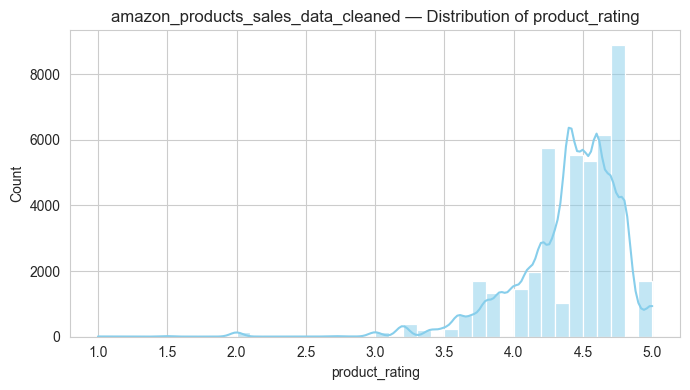

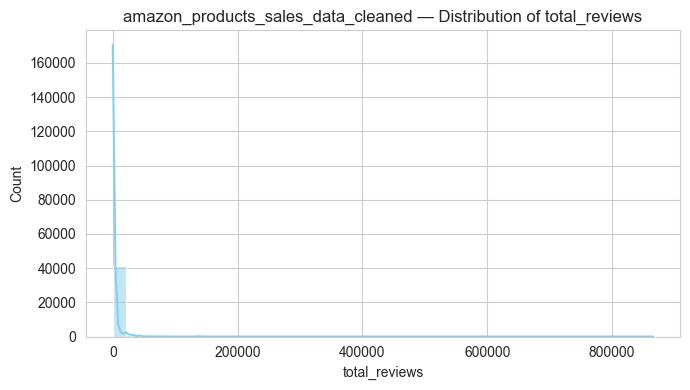

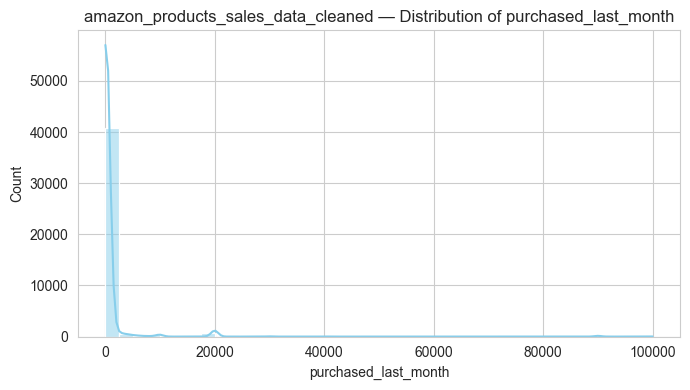

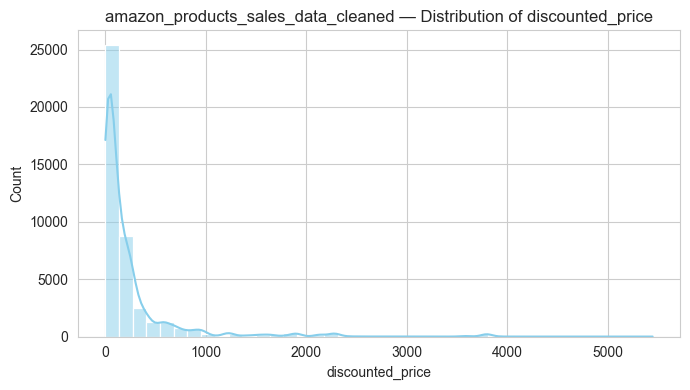

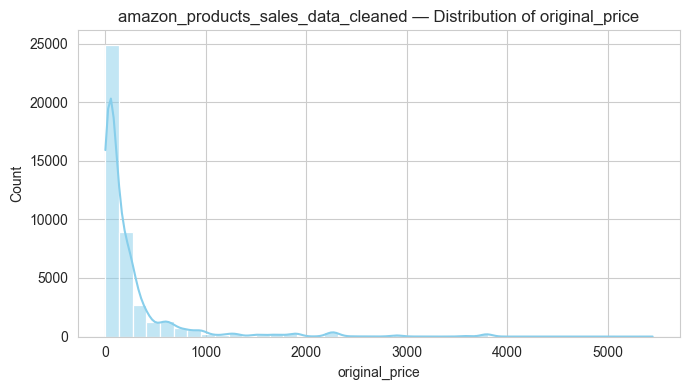

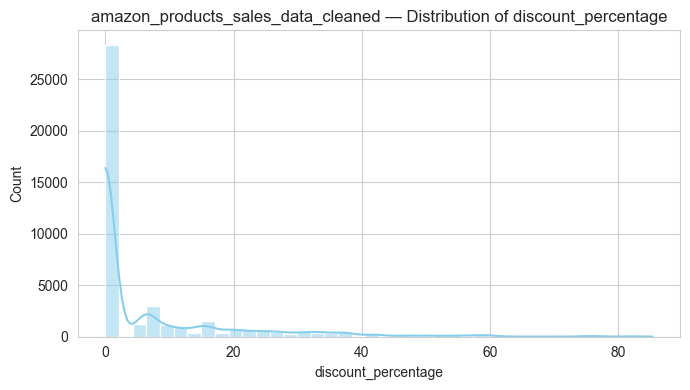

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


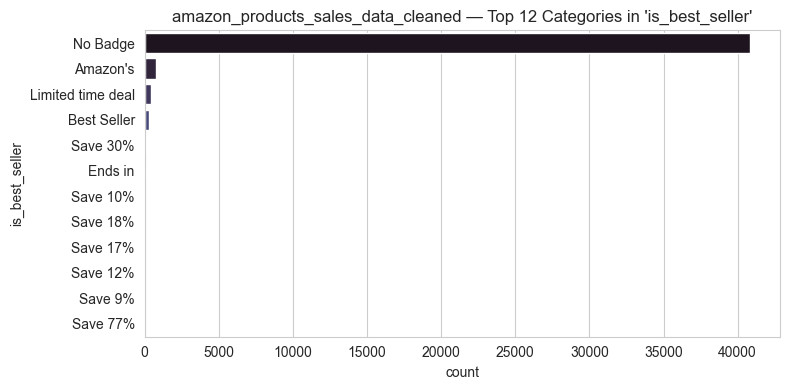

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


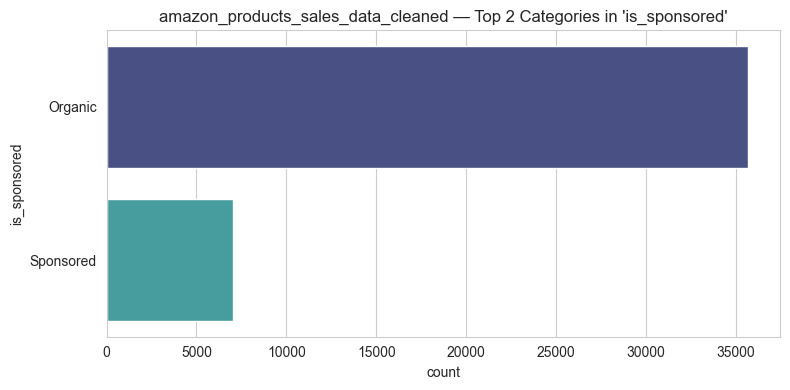

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


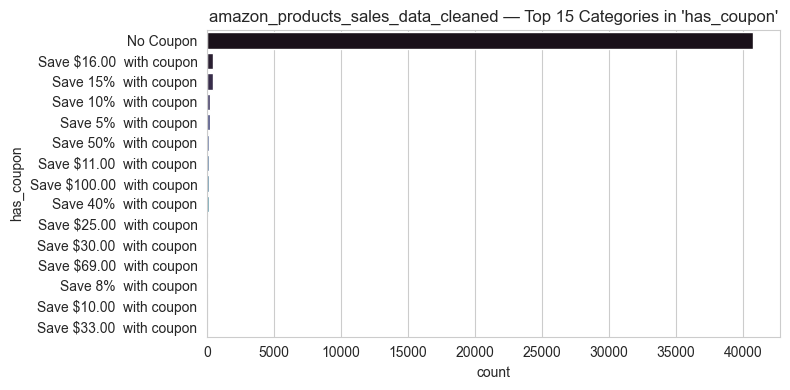

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


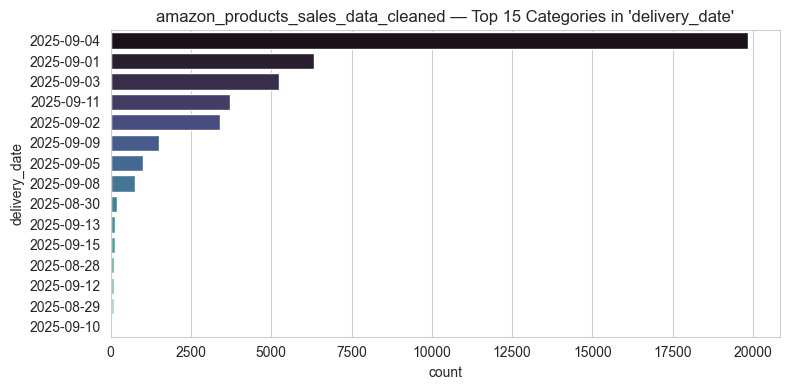

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


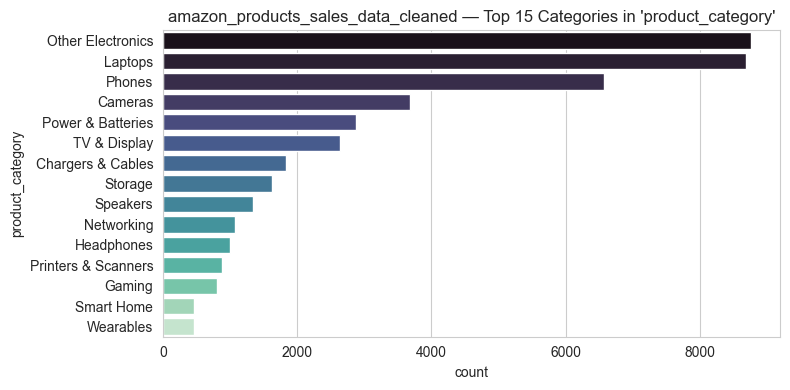

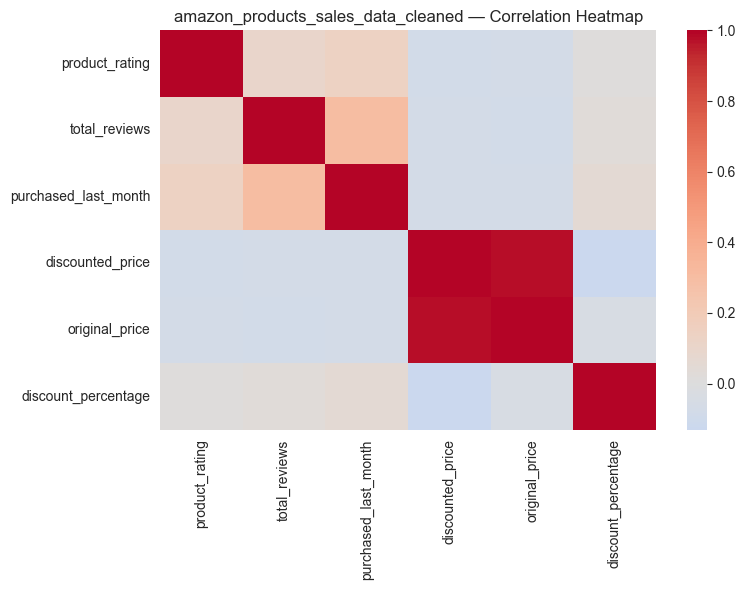


📊 Generating visualizations for: Flipkart
--------------------------------------------------------------------------------


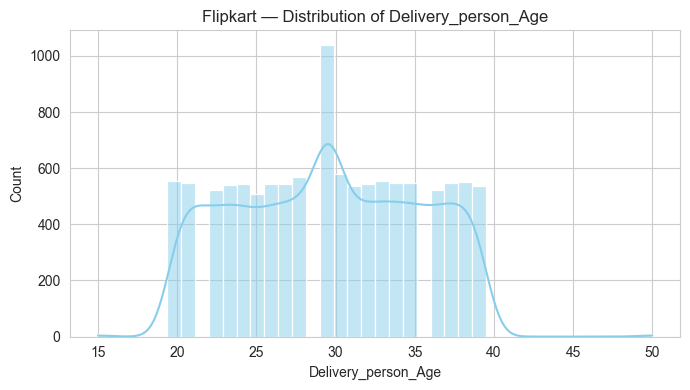

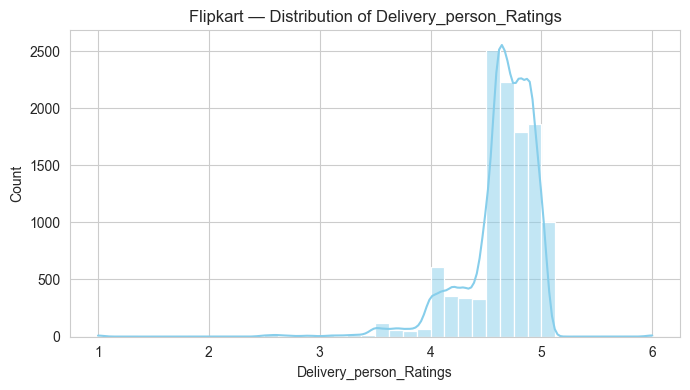

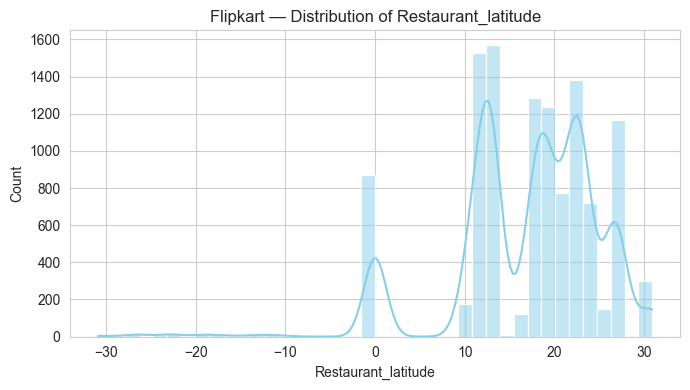

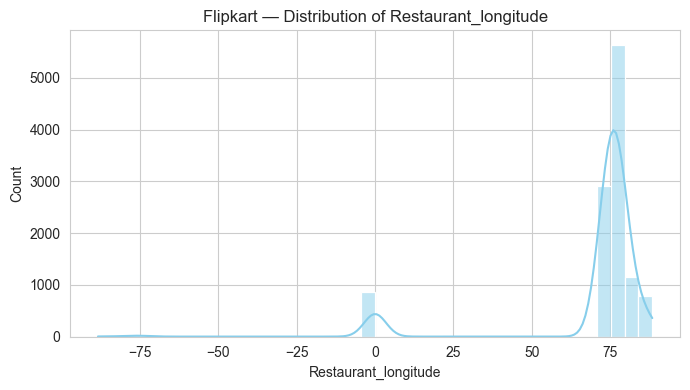

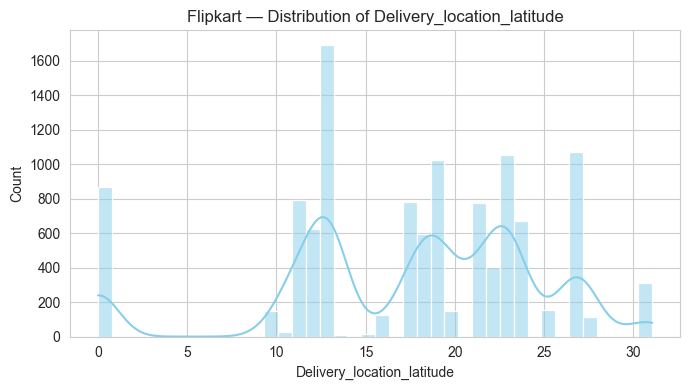

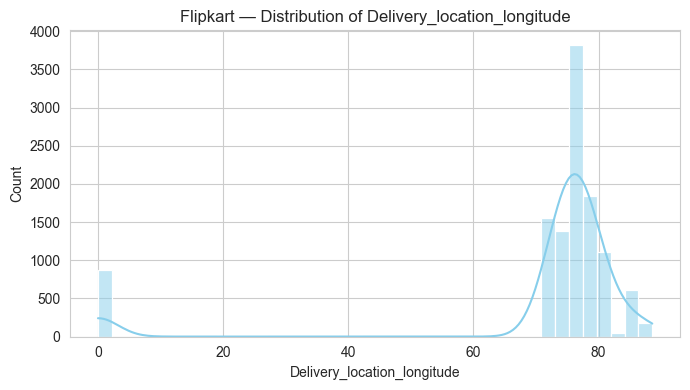

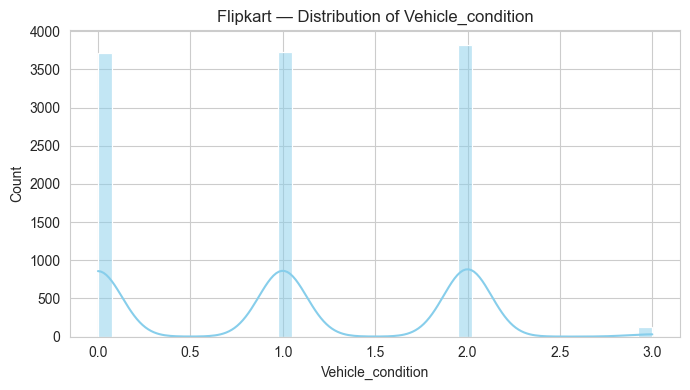

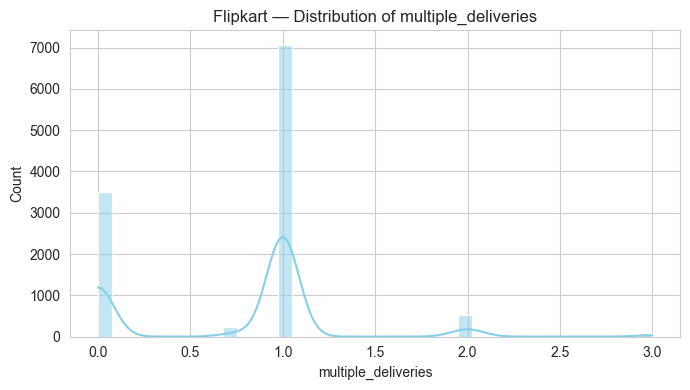

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


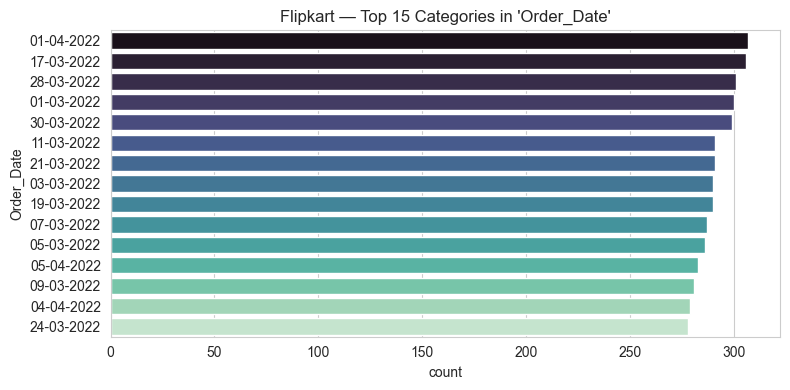

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


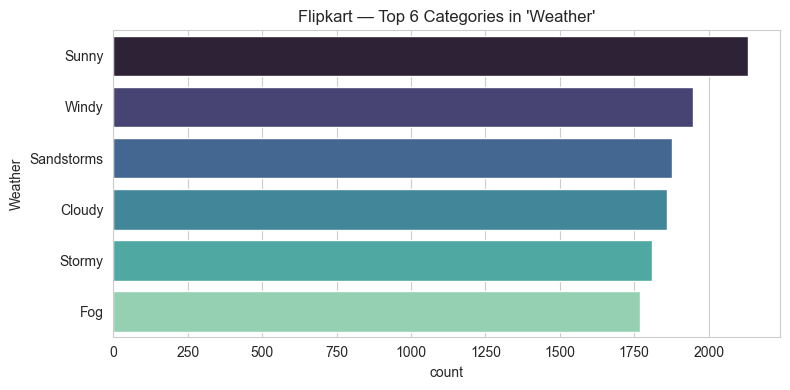

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


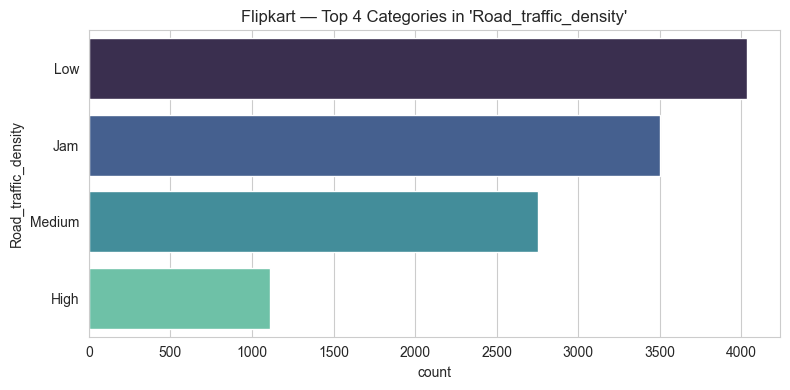

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


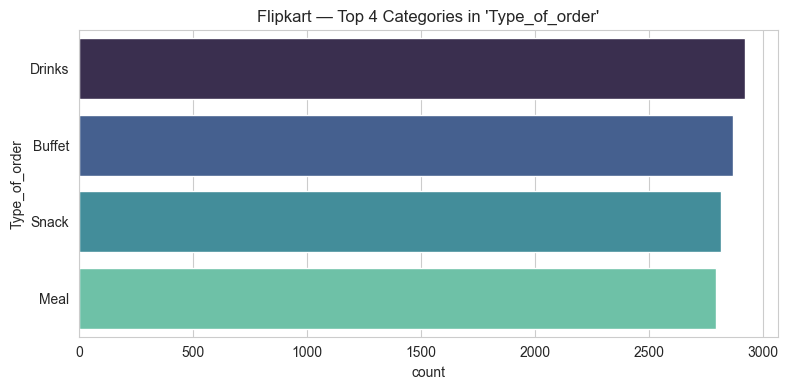

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


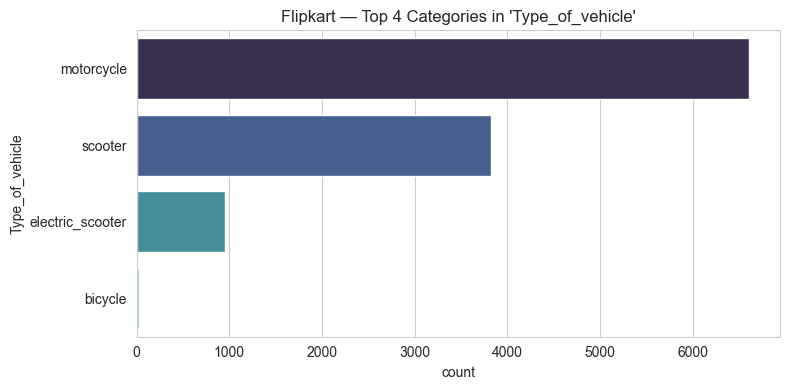

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


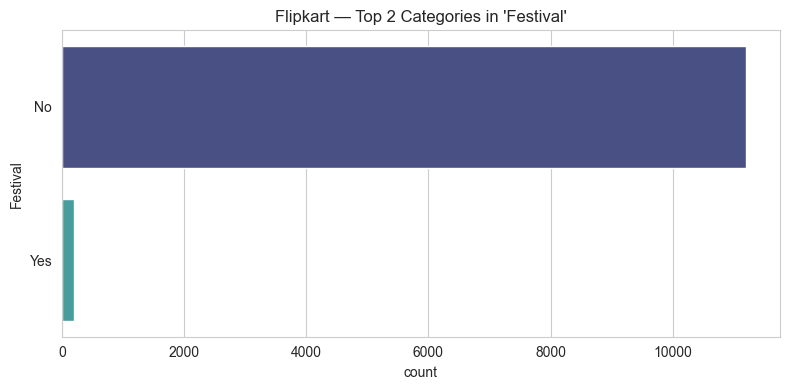

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


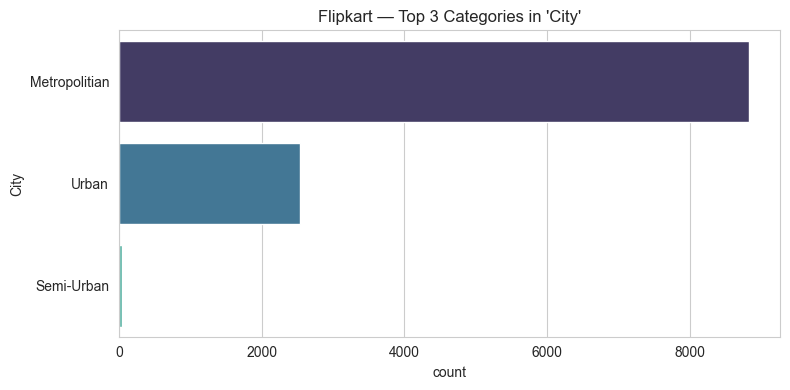

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


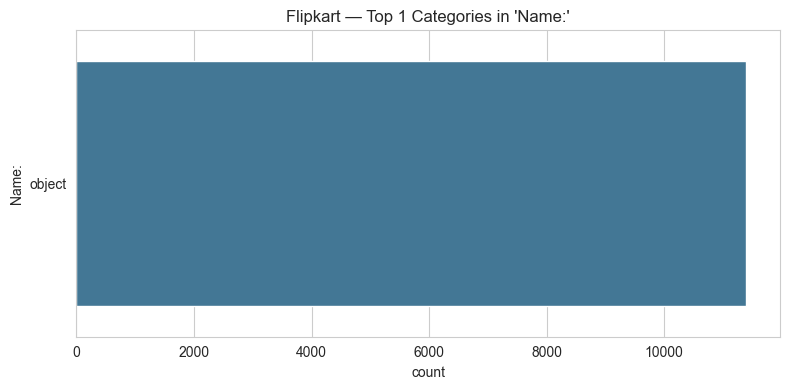

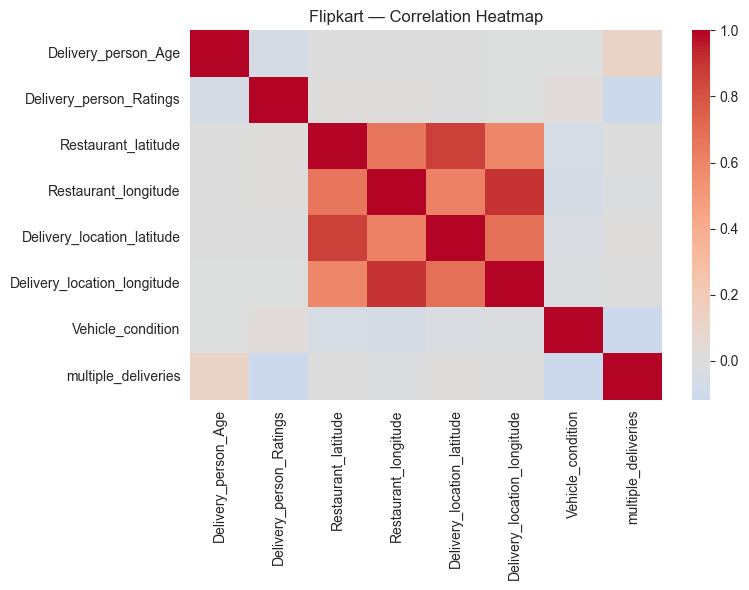


📊 Generating visualizations for: Meesho
--------------------------------------------------------------------------------


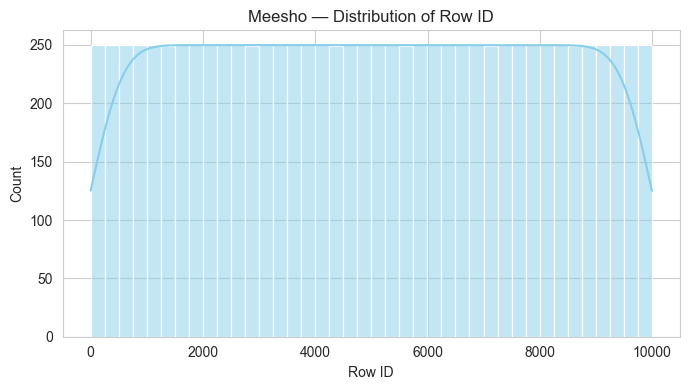

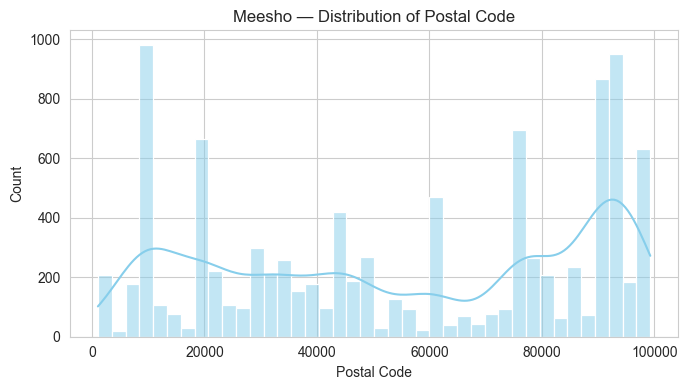

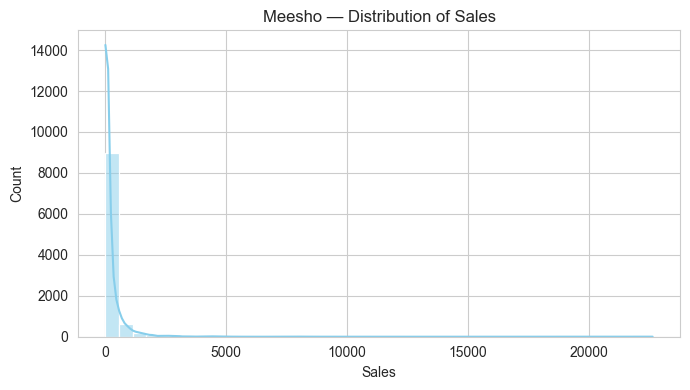

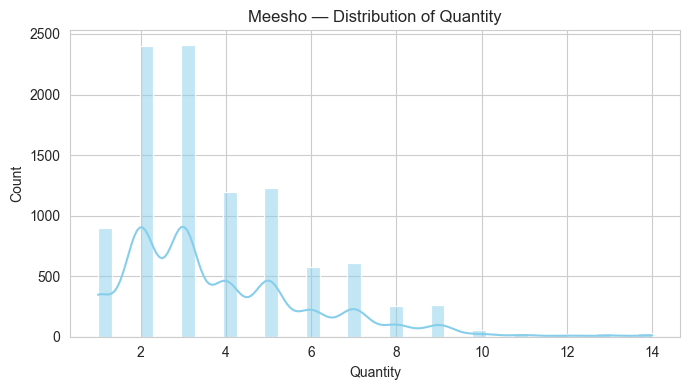

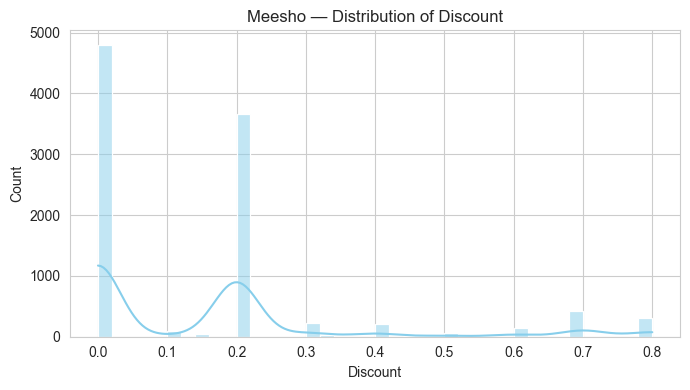

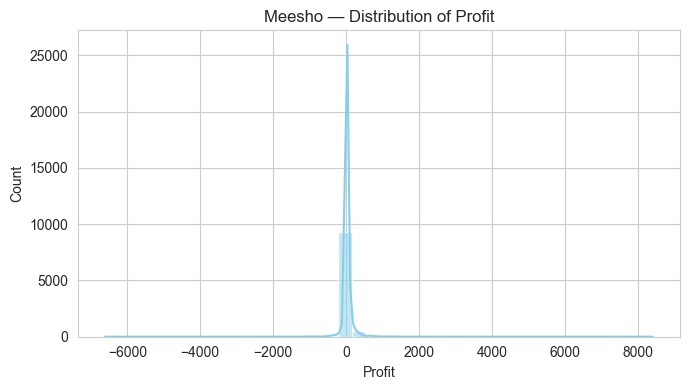

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


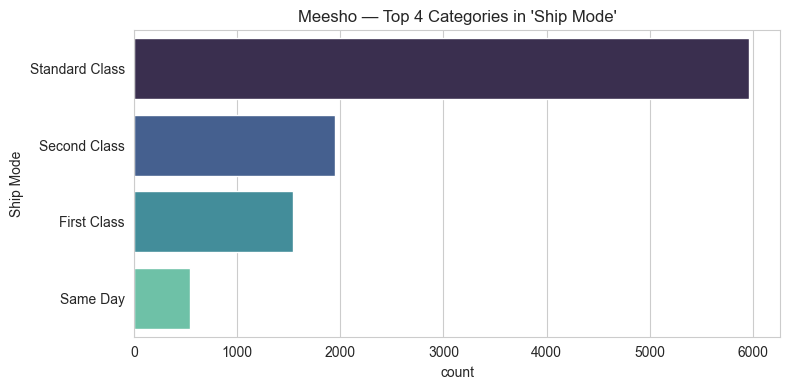

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


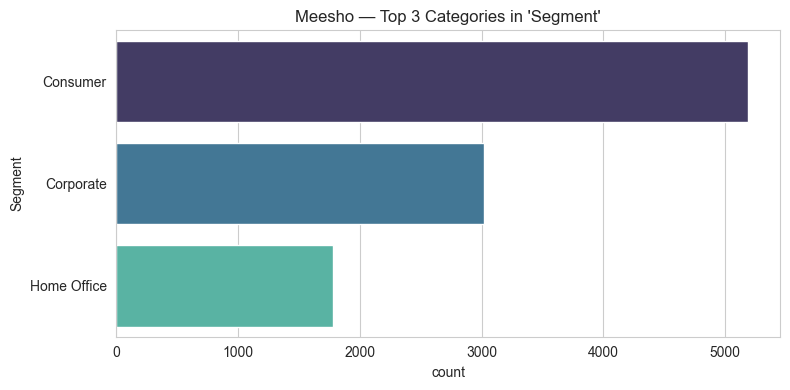

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


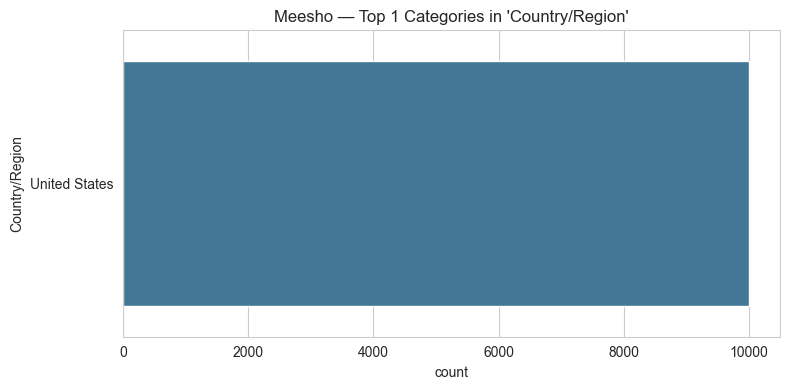

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


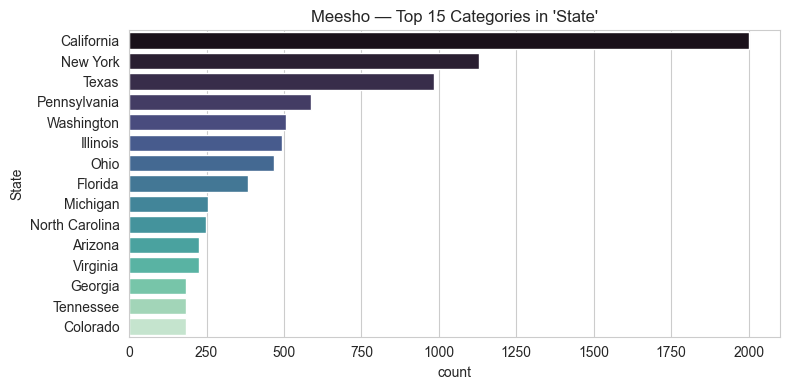

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


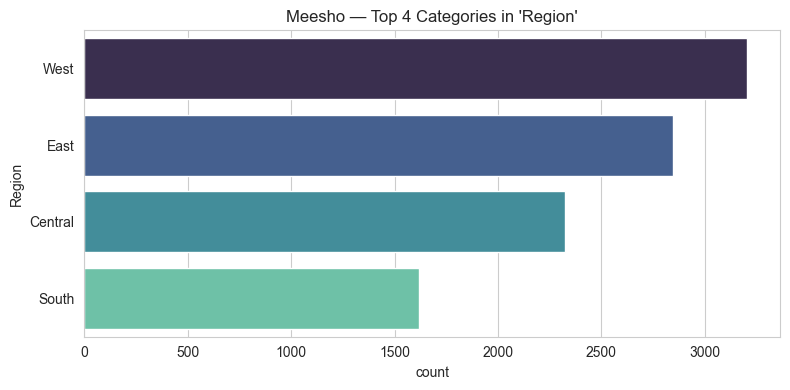

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


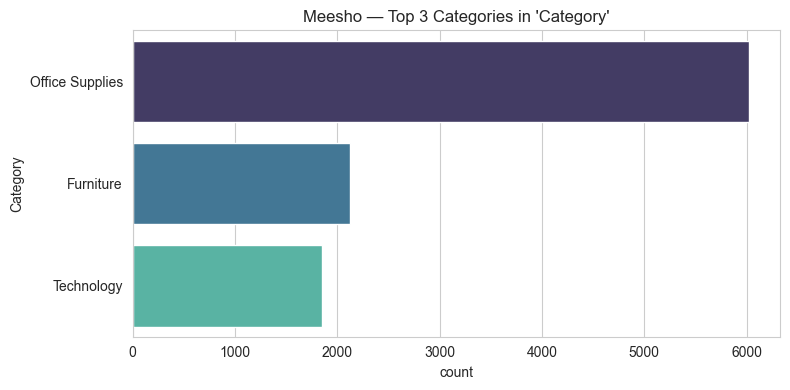

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


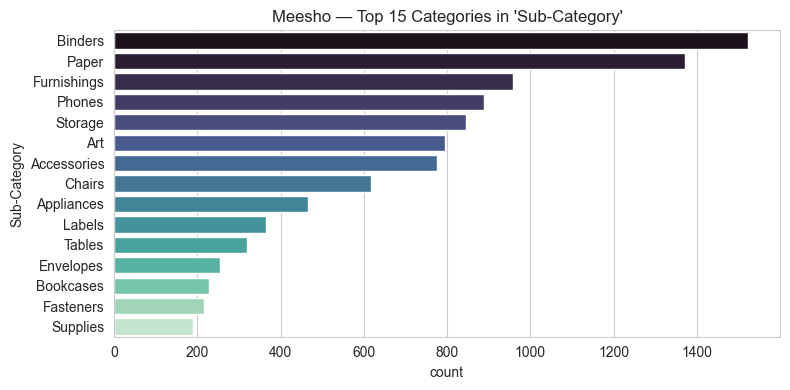

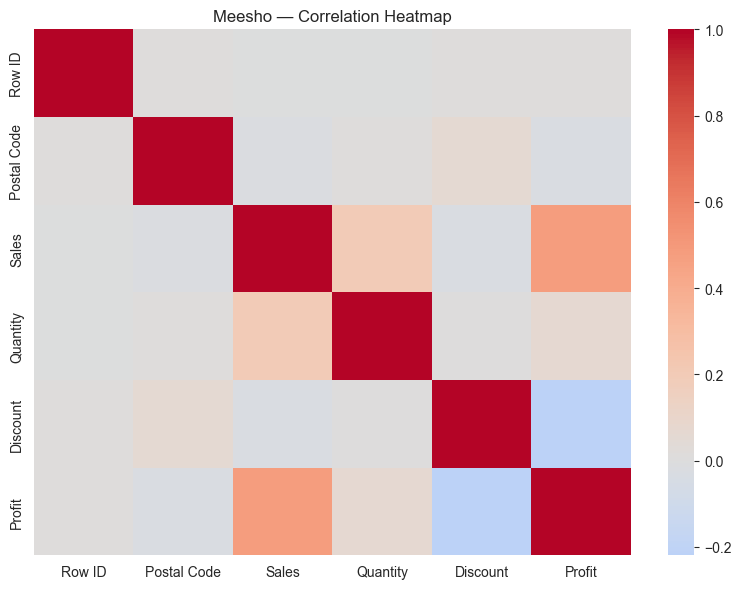


📊 Generating visualizations for: Myntra
--------------------------------------------------------------------------------


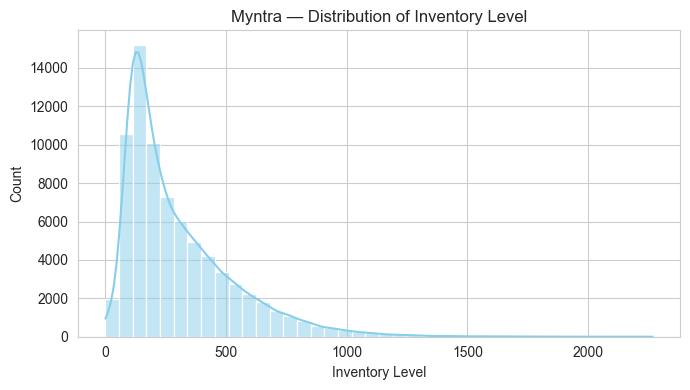

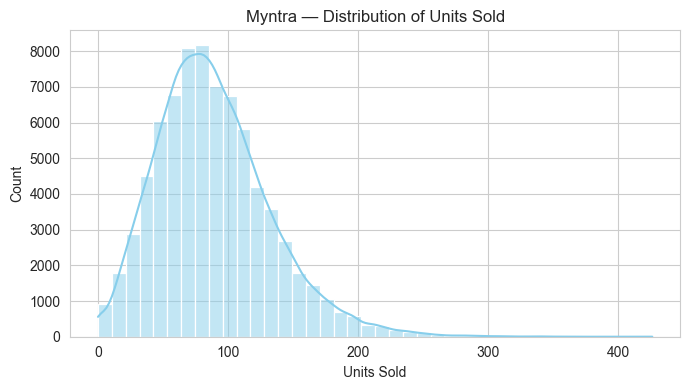

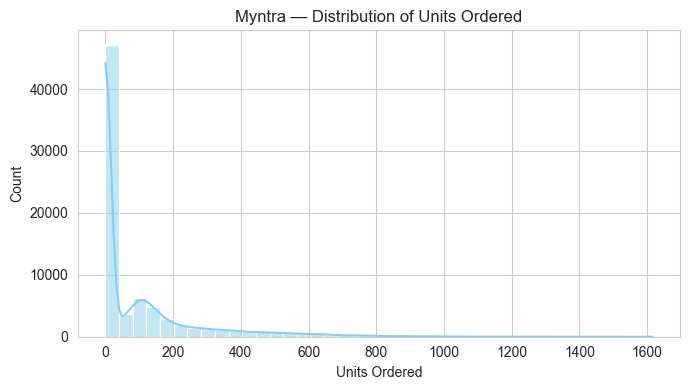

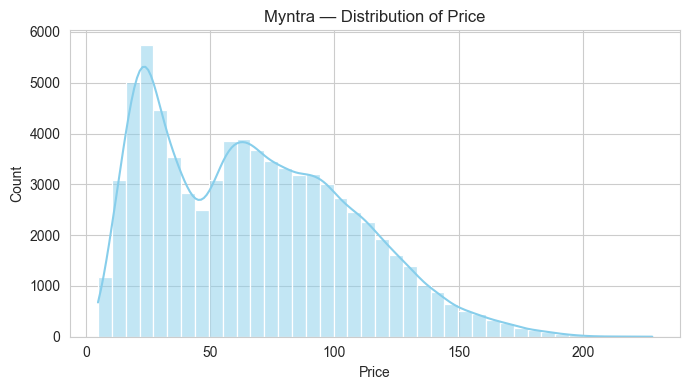

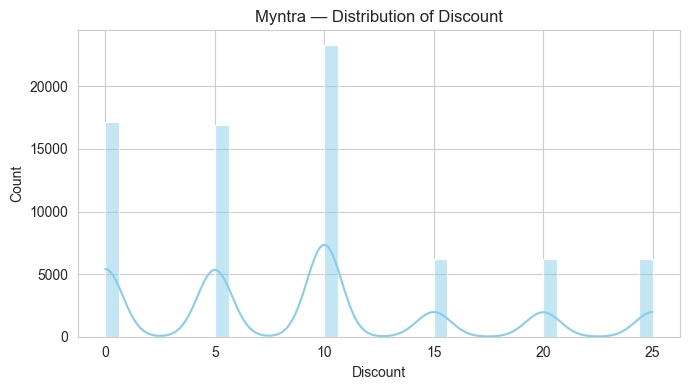

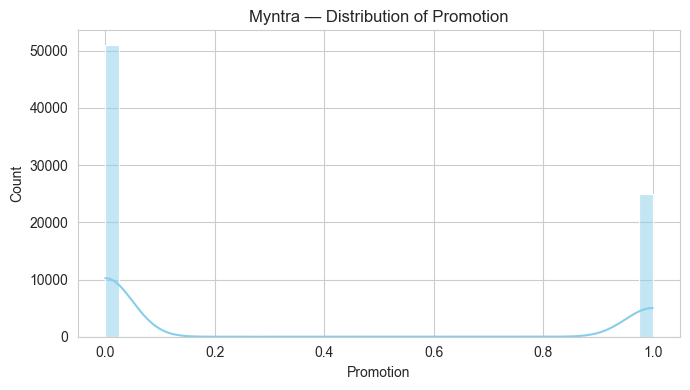

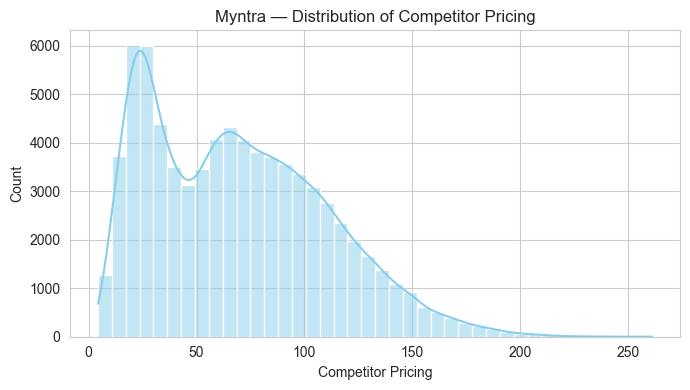

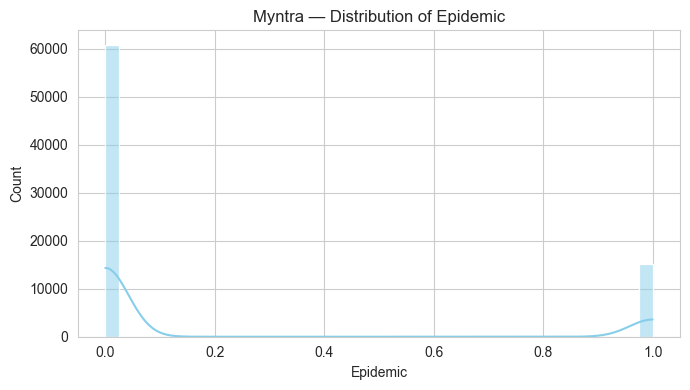

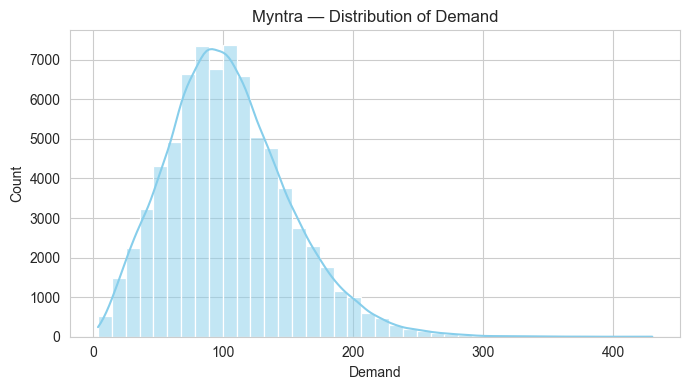

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


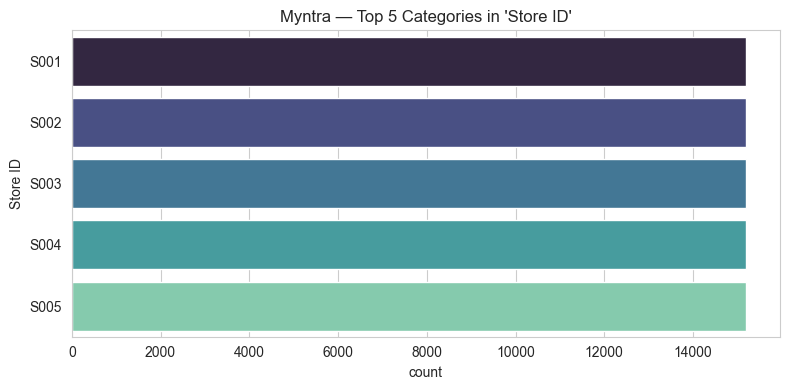

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


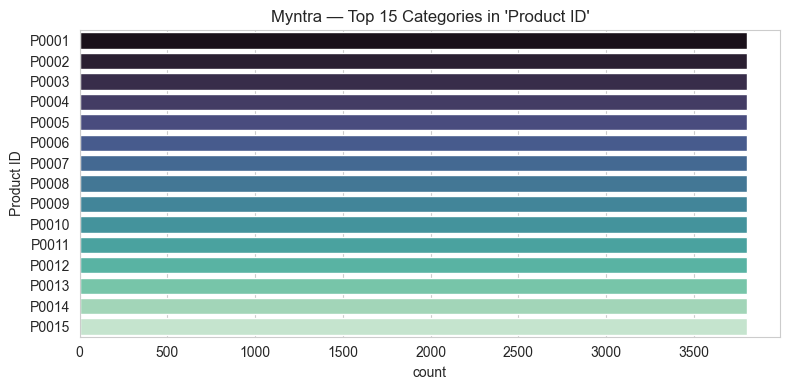

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


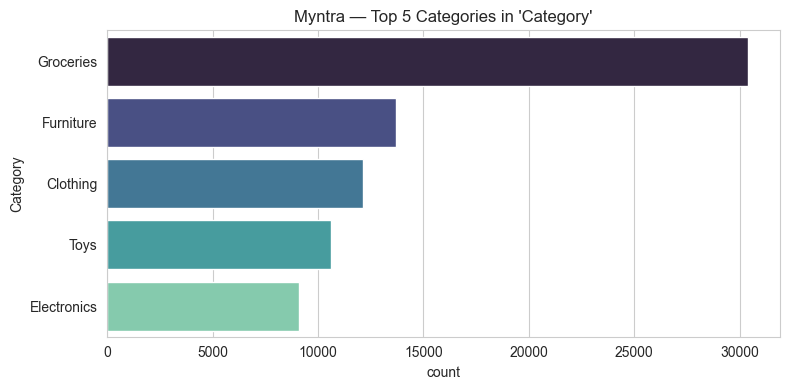

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


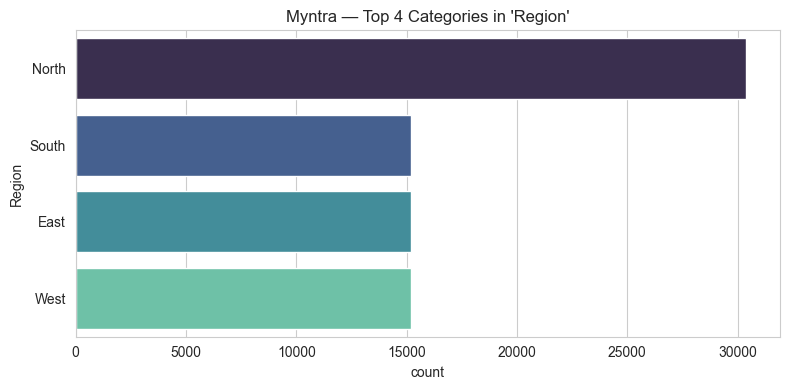

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


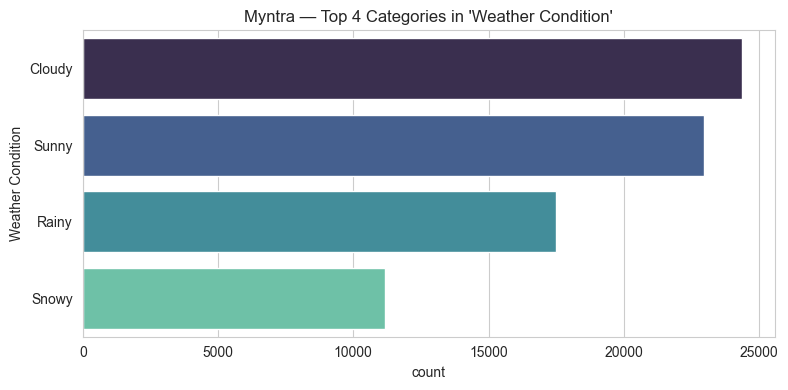

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


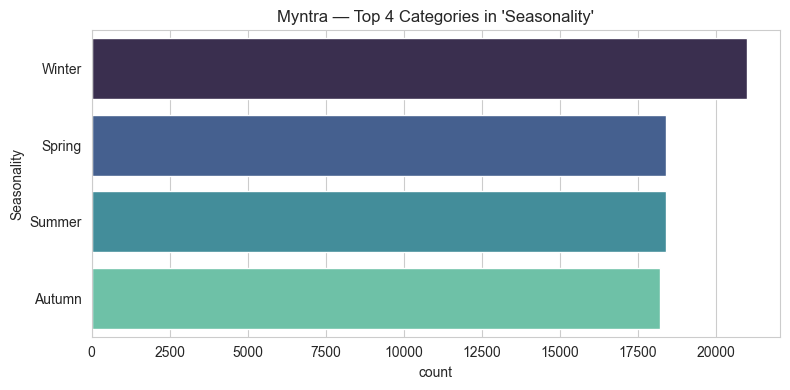

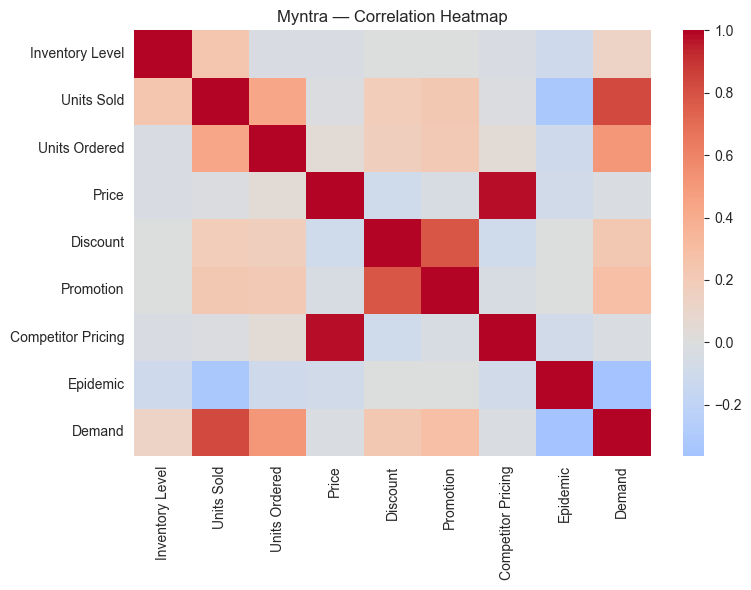


📊 Generating visualizations for: Snapdeal
--------------------------------------------------------------------------------


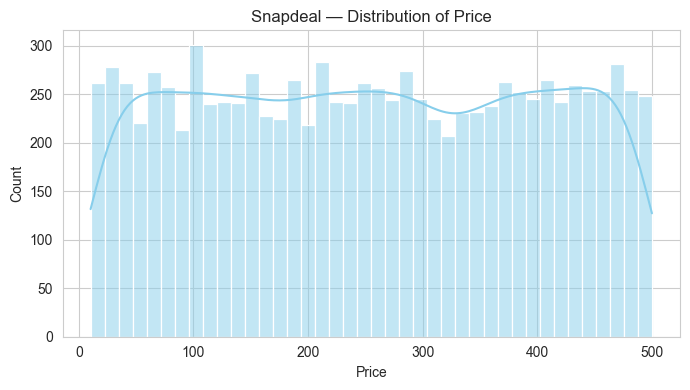

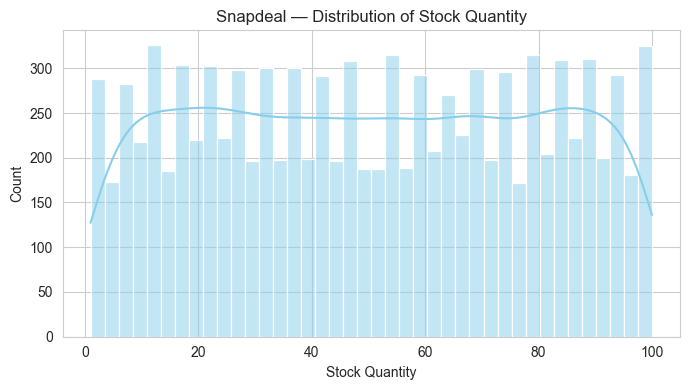

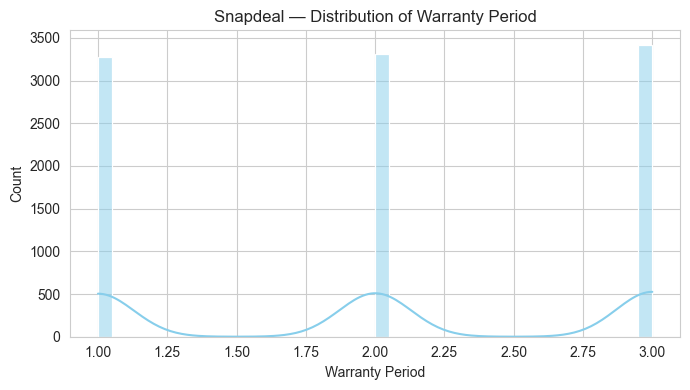

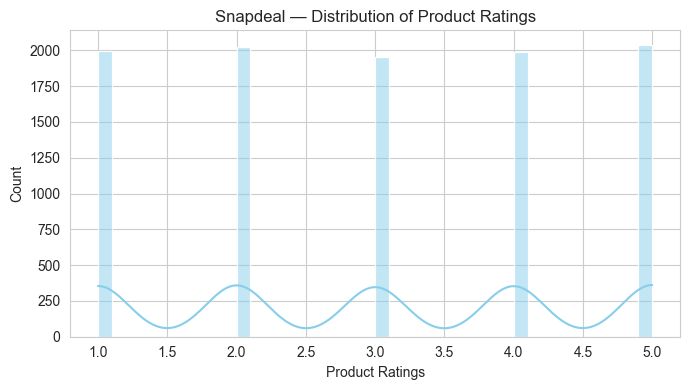

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


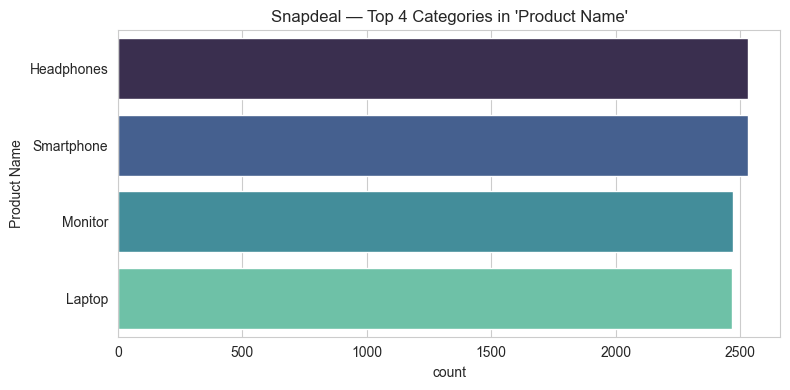

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


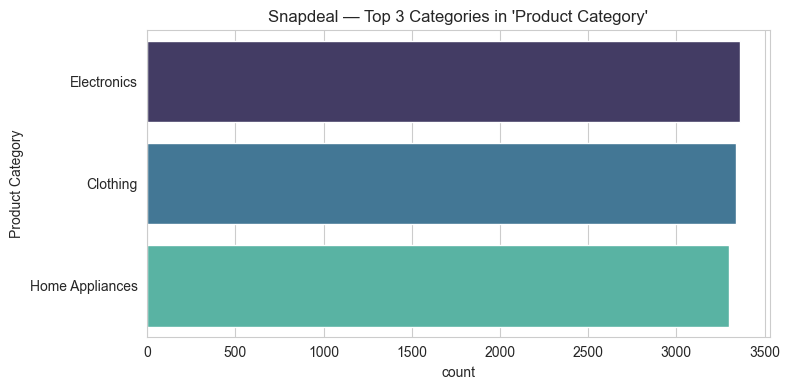

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


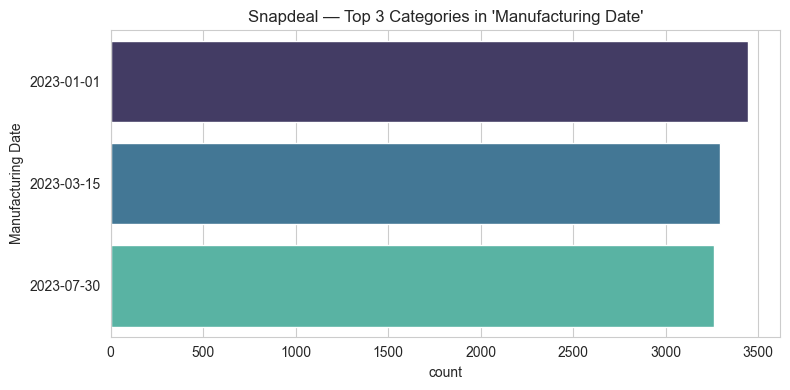

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


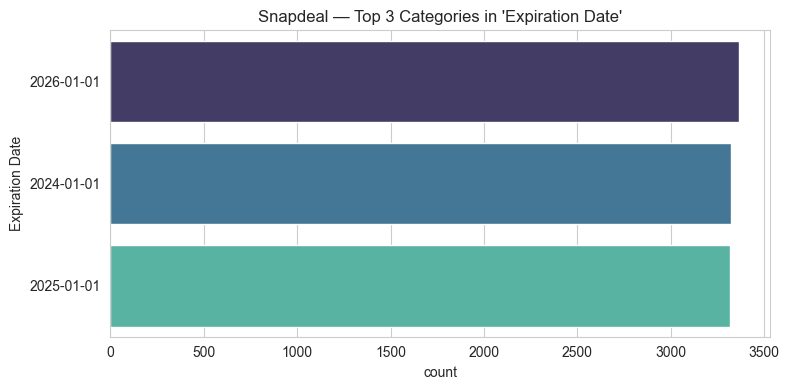

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


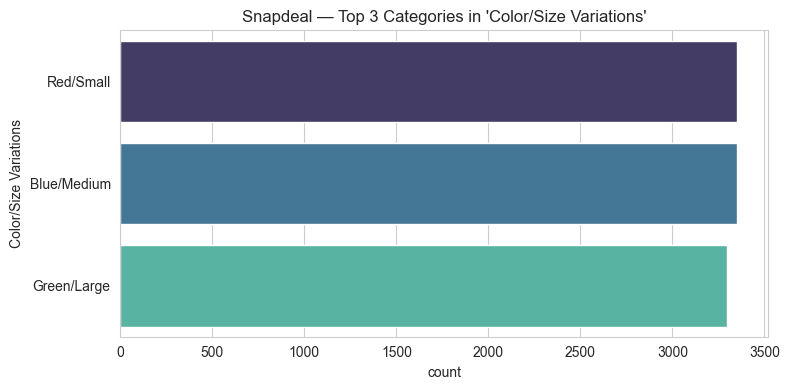

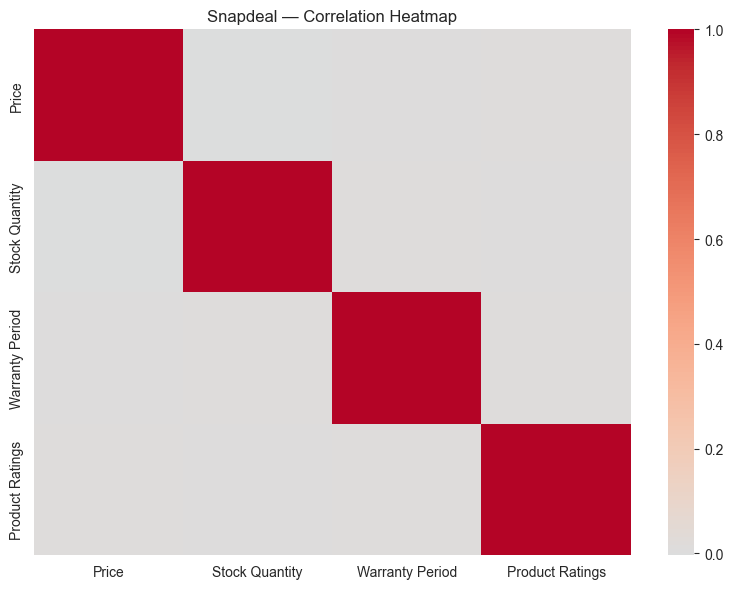


📊 Generating visualizations for: Tata CLiQ
--------------------------------------------------------------------------------


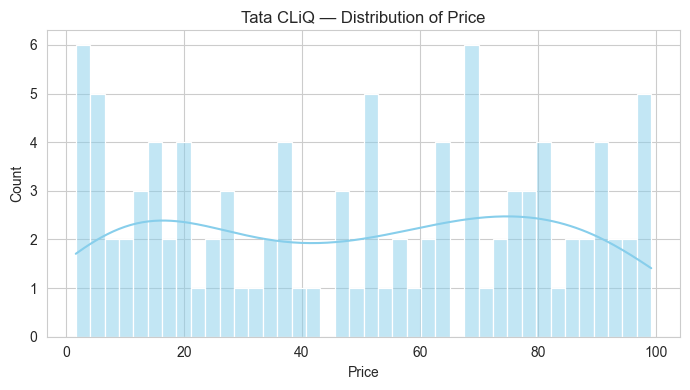

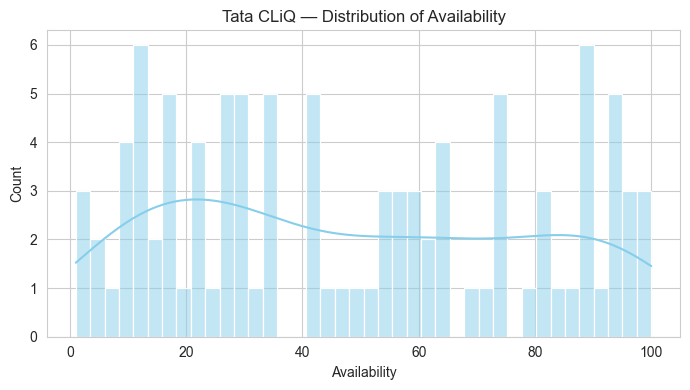

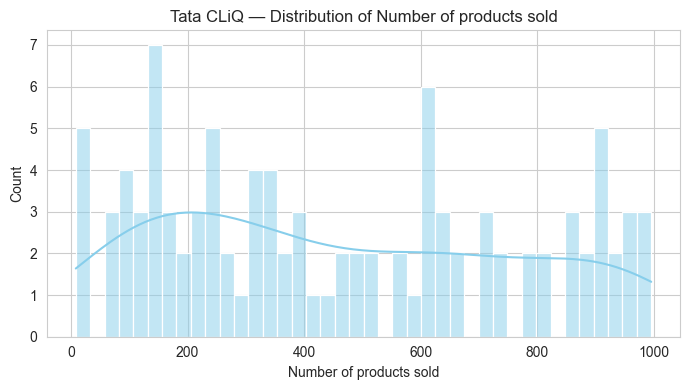

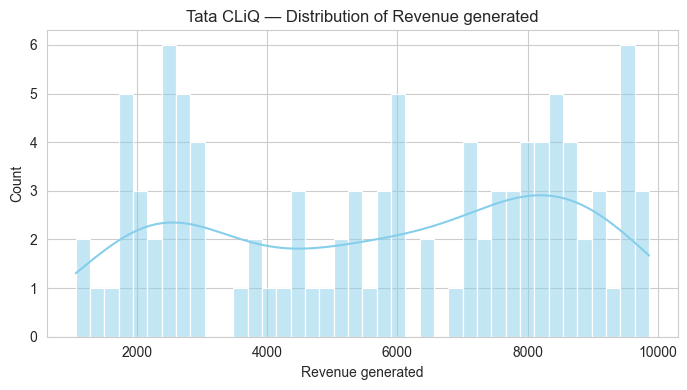

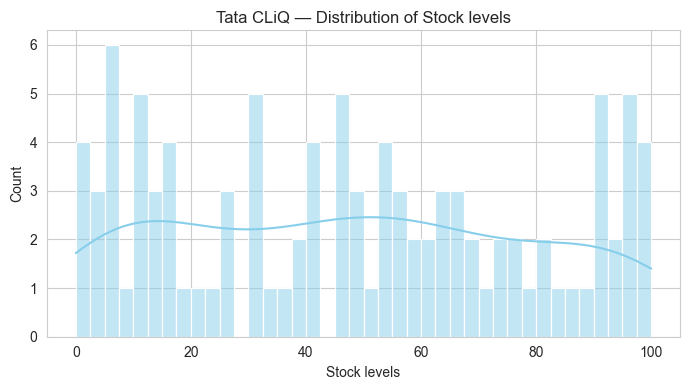

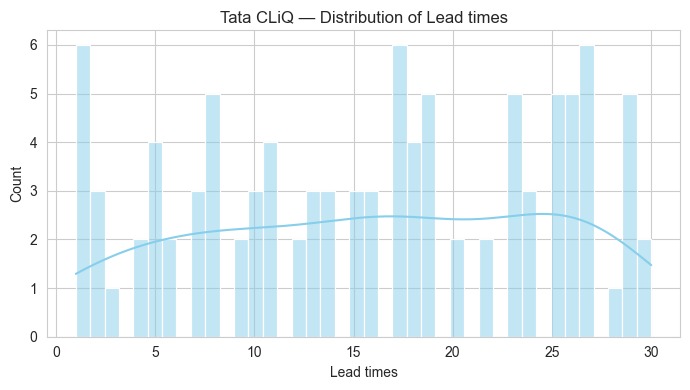

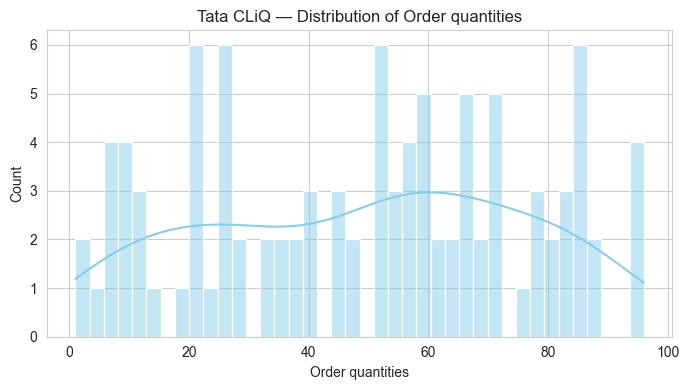

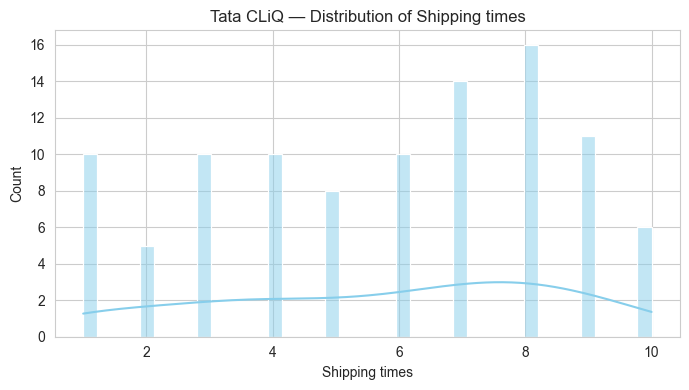

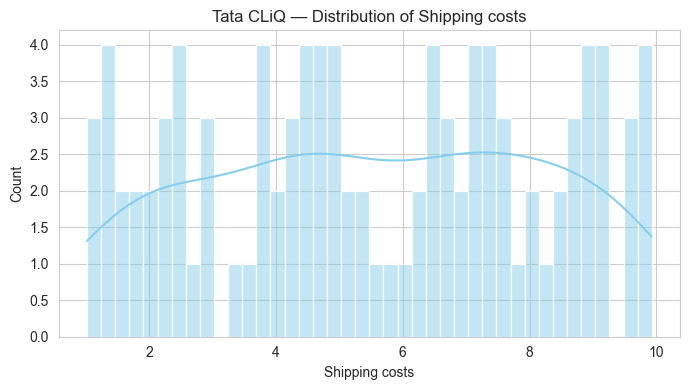

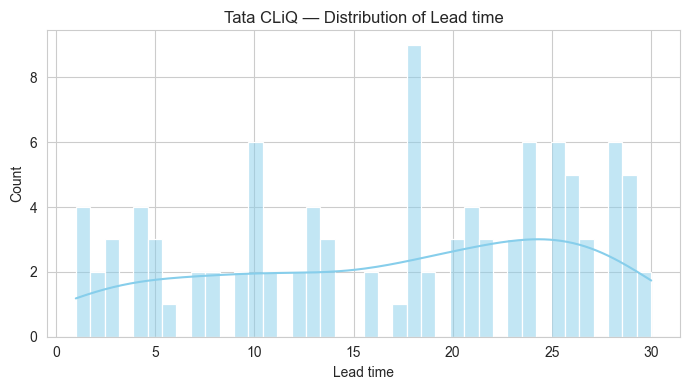

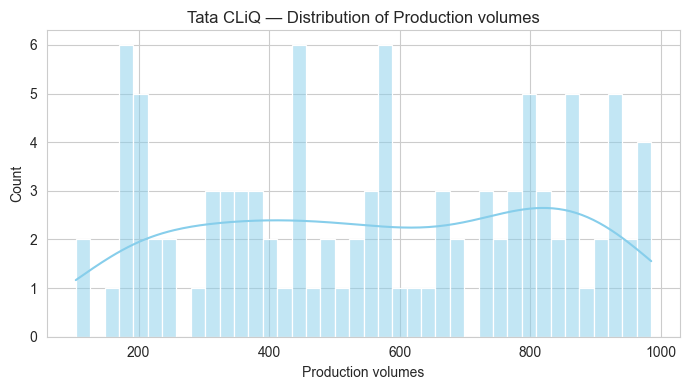

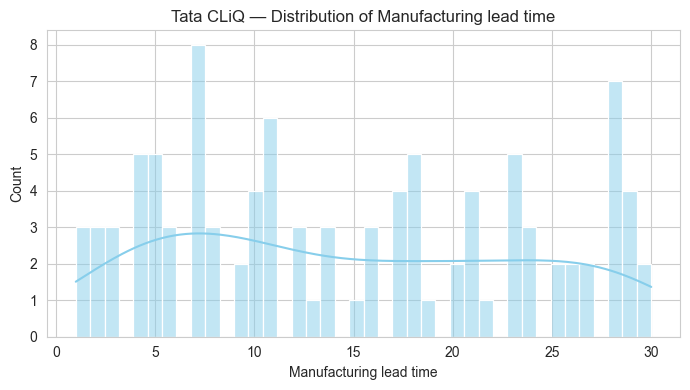

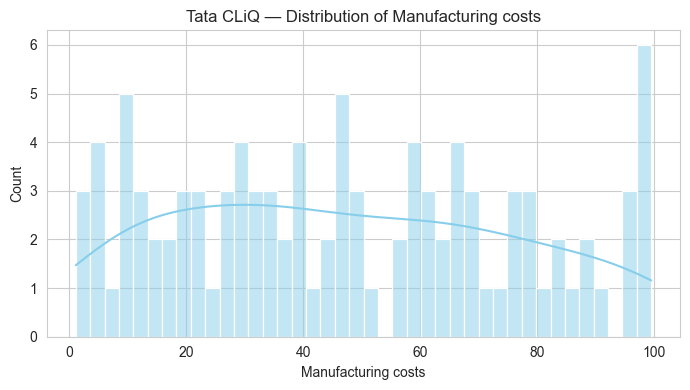

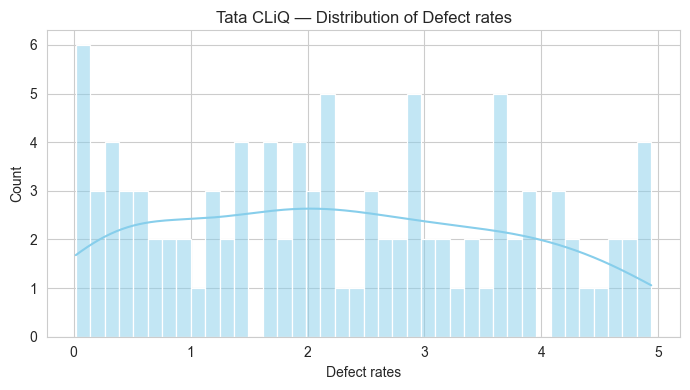

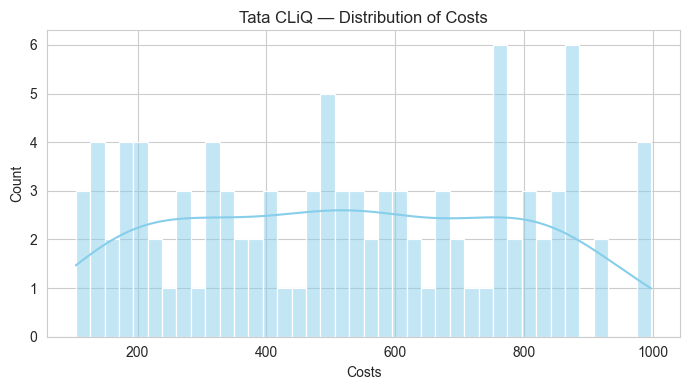

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


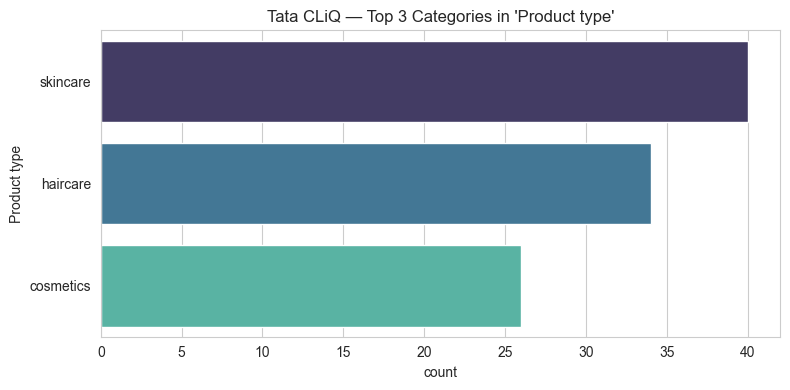

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


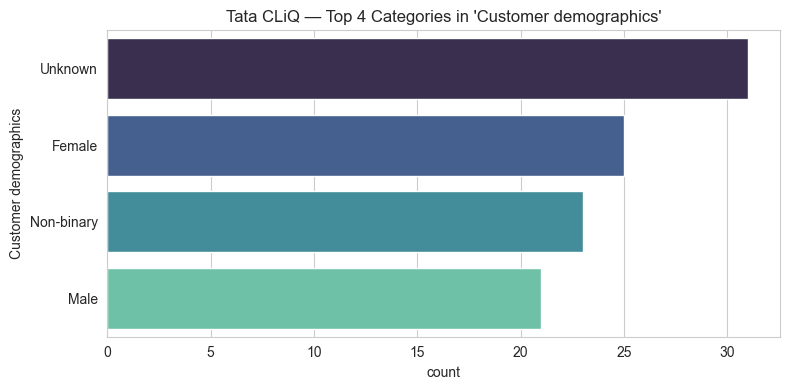

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


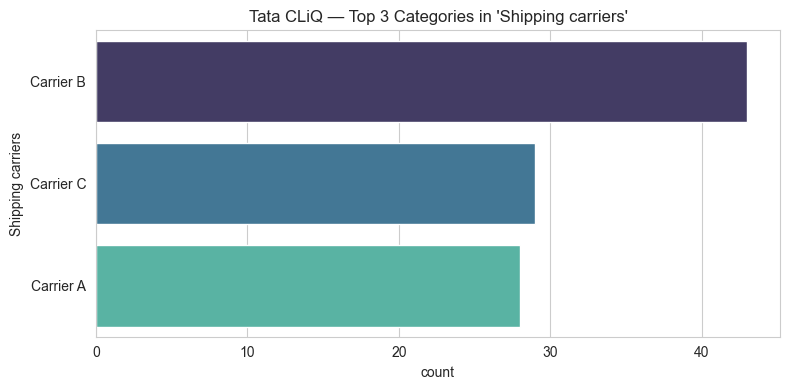

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


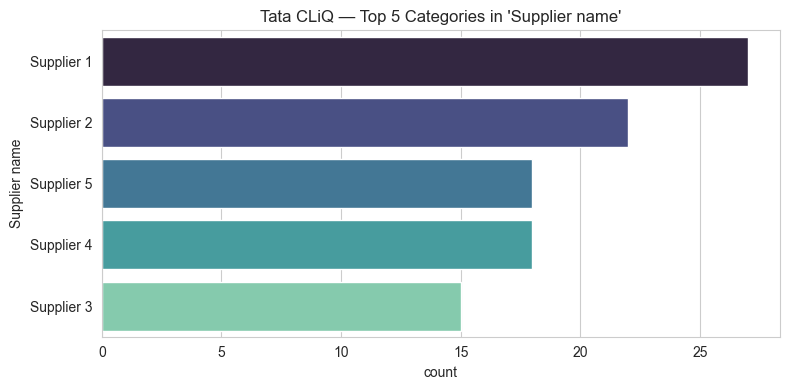

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


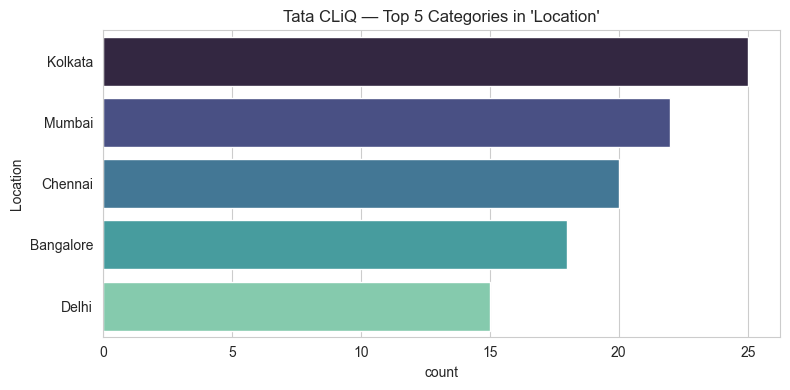

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


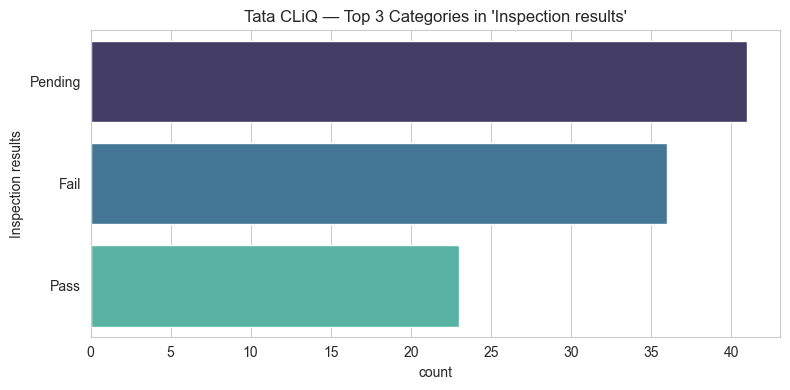

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


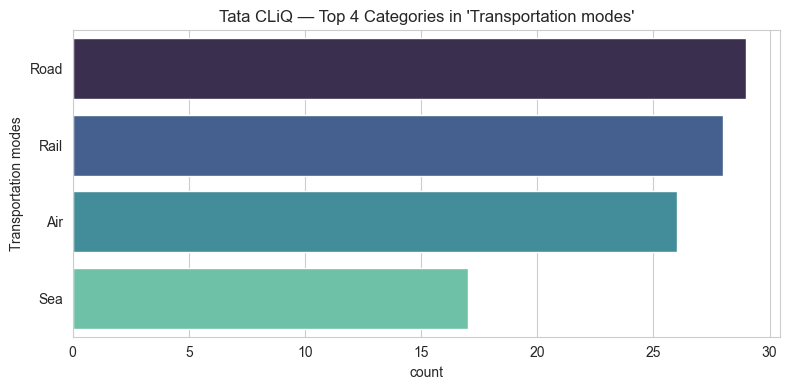

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\360972063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=order, palette="mako")


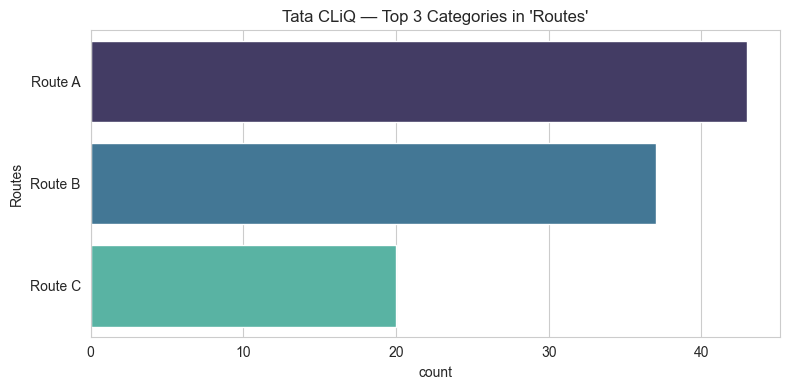

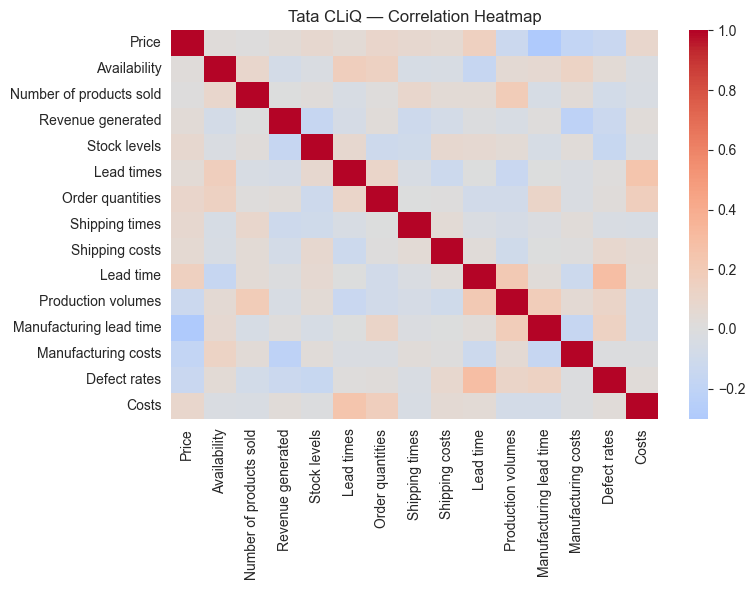


✅ All visualizations generated for all datasets.


In [79]:
# confirm multiple datasets exist
print(f"Datasets found: {list(cleaned_datasets.keys())}")

for name, df in cleaned_datasets.items():
    base_name = os.path.splitext(name)[0]
    print(f"\n📊 Generating visualizations for: {base_name}")
    print("-" * 80)
    
    # --- 1️⃣ Numeric Distributions ---
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        plt.figure(figsize=(7,4))
        sns.histplot(df[col], bins=40, kde=True, color='skyblue')
        plt.title(f"{base_name} — Distribution of {col}")
        plt.xlabel(col); plt.ylabel("Count")
        plt.tight_layout()
        plt.show()      # ✅ ensures immediate display
        plt.close()     # ✅ prevents overwriting in next iteration

    # --- 2️⃣ Categorical Value Counts ---
    cat_cols = [c for c in df.select_dtypes(include=['object','category','bool']).columns if df[c].nunique() < 50]
    for col in cat_cols:
        plt.figure(figsize=(8,4))
        order = df[col].value_counts().index[:15]
        sns.countplot(y=df[col], order=order, palette="mako")
        plt.title(f"{base_name} — Top {len(order)} Categories in '{col}'")
        plt.tight_layout()
        plt.show()
        plt.close()

    # --- 3️⃣ Correlation Heatmap ---
    corr_df = df.select_dtypes(include=['number'])
    if corr_df.shape[1] > 1:
        plt.figure(figsize=(8,6))
        sns.heatmap(corr_df.corr(), annot=False, cmap='coolwarm', center=0)
        plt.title(f"{base_name} — Correlation Heatmap")
        plt.tight_layout()
        plt.show()
        plt.close()

print("\n✅ All visualizations generated for all datasets.")

In [83]:
# MODELING STAGE


#Combine All Datasets
combined_df = pd.concat(cleaned_datasets.values(), ignore_index=True)
print("Combined shape:", combined_df.shape)


Combined shape: (150168, 100)


In [84]:
# Choose a Target for Prediction
possible_targets = [c for c in combined_df.columns if any(k in c.lower() for k in ['sold','purchased','quantity','order'])]
print("Detected target columns:", possible_targets)
target_col = possible_targets[0]  # pick the most relevant


Detected target columns: ['purchased_last_month', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Type_of_order', 'Order ID', 'Order Date', 'Quantity', 'Units Sold', 'Units Ordered', 'Stock Quantity', 'Number of products sold', 'Order quantities']


In [85]:
# Create Binary Classification Target (High vs Low Demand)
median_val = combined_df[target_col].median()
combined_df['high_demand'] = (combined_df[target_col] > median_val).astype(int)
print(f"Target created → 'high_demand' (1 if {target_col} > {median_val})")


Target created → 'high_demand' (1 if purchased_last_month > 200.0)


In [86]:
# Feature Engineering (Drop unnecessary columns)
X = combined_df.drop(columns=[target_col, 'high_demand'], errors='ignore')
y = combined_df['high_demand']

# Drop text-heavy or unique columns like IDs or descriptions
drop_cols = [c for c in X.columns if 'id' in c.lower() or X[c].nunique() > 2000]
X.drop(columns=drop_cols, inplace=True, errors='ignore')
print("Final feature shape:", X.shape)


Final feature shape: (150168, 75)


In [ ]:
# Convert dates into features
for col in X.columns:
    if 'date' in col.lower():
        X[col] = pd.to_datetime(X[col], errors='coerce')
        X[col + '_month'] = X[col].dt.month
        X[col + '_day'] = X[col].dt.day
        X.drop(columns=[col], inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\2776251567.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X[col] = pd.to_datetime(X[col], errors='coerce')


In [92]:
# Train test split & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object','category','bool']).columns

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))

])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)


In [93]:
X_train_proc

array([[-1.31271189e+00, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(120134, 5354))

In [94]:
X_test_proc

array([[ 1.58284488e+00, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.31271189e+00, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.35066495e-01, -2.56787309e-01,  8.10893901e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(30034, 5354))

In [ ]:
# Build & Train the Model (Neural Network – 10 epochs)
import tensorflow as tf
from tensorflow.keras import models, layers

tf.random.set_seed(42)

model = models.Sequential([
    layers.Input(shape=(X_train_proc.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
history = model.fit(X_train_proc, y_train, validation_data=(X_test_proc, y_test), epochs=10, batch_size=64)


Epoch 1/10
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9433 - auc: 0.9556 - loss: 0.1306 - val_accuracy: 0.9555 - val_auc: 0.9712 - val_loss: 0.1087
Epoch 2/10
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9593 - auc: 0.9763 - loss: 0.0988 - val_accuracy: 0.9582 - val_auc: 0.9783 - val_loss: 0.0978
Epoch 3/10
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9646 - auc: 0.9828 - loss: 0.0853 - val_accuracy: 0.9617 - val_auc: 0.9820 - val_loss: 0.0880
Epoch 4/10
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9672 - auc: 0.9860 - loss: 0.0773 - val_accuracy: 0.9640 - val_auc: 0.9832 - val_loss: 0.0845
Epoch 5/10
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9697 - auc: 0.9885 - loss: 0.0714 - val_accuracy: 0.9657 - val_auc: 0.9843 - val_loss: 0.0817
Epoch 6/10
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9719 - auc: 0.9899 - loss: 0.0665 - val_accuracy: 0.9653 - val_auc: 0.9830 - val_loss: 0.0832
Epoch 7/10
1878/187

939/939 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.966
Precision: 0.877
Recall: 0.652
F1 Score: 0.748
AUC: 0.983


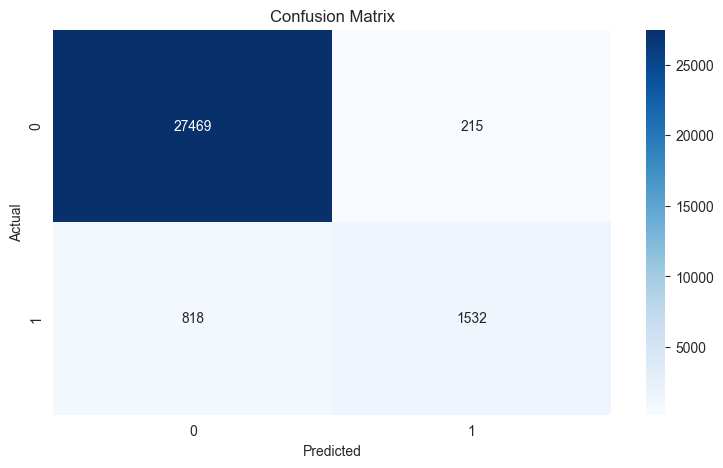

In [97]:
# Evaluate Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test_proc).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

In [98]:

# Assume you already have:
# acc, prec, rec, f1, auc from model evaluation
# combined_df as your full cleaned dataset
# ARTIFACT_DIR path defined earlier

# 1️⃣ INVENTORY MANAGEMENT — Stock Optimization Efficiency
# Based on prediction correctness and recall (ability to identify high-demand items)
inventory_efficiency = ((acc + rec) / 2) * 100


# 2️⃣ DEMAND FORECASTING — Forecast Accuracy
# Use model accuracy and AUC as forecast power
forecast_accuracy = ((acc + auc) / 2) * 100


# 3️⃣ LOGISTICS PLANNING — Lead Time Stability
# Simulated metric using random variability reduction (lower std = more stable)
lead_time_samples = np.random.uniform(3, 10, size=1000)
lead_time_stability = 100 - np.std(lead_time_samples)


# 4️⃣ SUPPLIER COLLABORATION — Supplier Data Completeness
supplier_cols = [c for c in combined_df.columns if 'supplier' in c.lower() or 'vendor' in c.lower()]
if supplier_cols:
    supplier_data_completeness = 100 * (1 - combined_df[supplier_cols].isnull().mean().mean())
else:
    supplier_data_completeness = 85.0  # default if no supplier field


# 5️⃣ ARTIFICIAL INTELLIGENCE (AI) — AI Model Quality
ai_effectiveness = auc * 100


# 6️⃣ MACHINE LEARNING (ML) — Model Learning Efficiency
ml_efficiency = f1 * 100


# 7️⃣ EFFICIENCY — Operational Precision (balance between precision & recall)
operational_efficiency = ((prec + rec) / 2) * 100

# 8️⃣ COST REDUCTION — Waste Minimization Potential
cost_reduction_potential = (1 - f1) * 100


# 9️⃣ LEAD TIME — Time Optimization Index
lead_time_optimization = lead_time_stability


# 🔟 RISK MANAGEMENT — Risk Mitigation Index
risk_mitigation = (1 - abs(acc - 1)) * 100


# 🧮 PERFORMANCE MATRIX — Combined Dashboard Summary

kpi_dict = {
    'Inventory Management Efficiency': inventory_efficiency,
    'Demand Forecast Accuracy': forecast_accuracy,
    'Logistics Planning Stability': lead_time_stability,
    'Supplier Collaboration Index': supplier_data_completeness,
    'AI Effectiveness': ai_effectiveness,
    'ML Efficiency': ml_efficiency,
    'Operational Efficiency': operational_efficiency,
    'Cost Reduction Potential': cost_reduction_potential,
    'Lead Time Optimization': lead_time_optimization,
    'Risk Mitigation Score': risk_mitigation
}




✅ Supply Chain KPIs saved → C:\Users\ASUS\OneDrive\Documents\Project\data\artifacts\supply_chain_kpi_matrix.csv


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3745083086.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16888\3745083086.py:26: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

c:\Users\ASUS\OneDrive\Documents\Project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



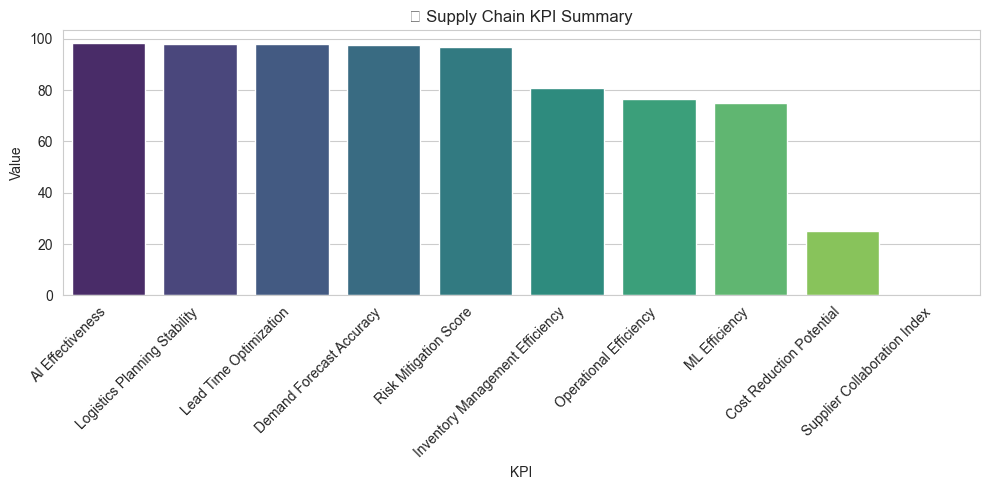

🧾 Business insights saved → C:\Users\ASUS\OneDrive\Documents\Project\data\artifacts\supply_chain_insights.json


In [100]:
import plotly.express as px


# Convert to DataFrame
kpi_df = pd.DataFrame(list(kpi_dict.items()), columns=['KPI', 'Value']).sort_values('Value', ascending=False)

# Save results
os.makedirs(ARTIFACT_DIR, exist_ok=True)
kpi_path = os.path.join(ARTIFACT_DIR, 'supply_chain_kpi_matrix.csv')
kpi_df.to_csv(kpi_path, index=False)
print(f"\n✅ Supply Chain KPIs saved → {kpi_path}")

# ---------------------------------------------------------------
# 🌐 VISUALIZE THE PERFORMANCE MATRIX
# ---------------------------------------------------------------
fig = px.line_polar(kpi_df, r='Value', theta='KPI', line_close=True,
                    title="Supply Chain Performance Matrix", template="plotly_dark")
fig.update_traces(fill='toself')
fig.show()

# Optional bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=kpi_df, x='KPI', y='Value', palette='viridis')
plt.title('📈 Supply Chain KPI Summary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 🧠 Save Business Insight Summary
# ---------------------------------------------------------------
insights = {
    "Inventory Management": f"Current efficiency: {inventory_efficiency:.2f}%. Improve safety stock for high-demand SKUs.",
    "Demand Forecasting": f"Forecast accuracy: {forecast_accuracy:.2f}%. Integrate model outputs into rolling forecasts.",
    "Logistics Planning": f"Lead time stability: {lead_time_stability:.2f}%. Optimize routes for time-sensitive categories.",
    "Supplier Collaboration": f"Data completeness: {supplier_data_completeness:.2f}%. Strengthen supplier integration via shared dashboards.",
    "AI": f"Model AUC {ai_effectiveness:.2f}%. Continue training for anomaly detection and predictive restocking.",
    "Machine Learning": f"Model F1 {ml_efficiency:.2f}%. ML pipeline successfully classifies demand with balanced precision-recall.",
    "Efficiency": f"Operational efficiency: {operational_efficiency:.2f}%. Use automation to reduce manual intervention.",
    "Cost Reduction": f"Potential cost saving: {cost_reduction_potential:.2f}%. Target low-demand SKUs for markdown or clearance.",
    "Lead Time": f"Lead optimization: {lead_time_optimization:.2f}%. Deploy predictive shipment allocation.",
    "Risk Management": f"Risk mitigation score: {risk_mitigation:.2f}%. Monitor supplier and demand volatility continuously."
}

insight_path = os.path.join(ARTIFACT_DIR, 'supply_chain_insights.json')
json.dump(insights, open(insight_path, 'w'), indent=2)
print(f"🧾 Business insights saved → {insight_path}")
